In [1424]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

plt.rcParams["figure.figsize"] = [8,8]

In [1425]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [1426]:
train_data.shape

(1460, 81)

In [1427]:
test_data.shape

(1459, 80)

In [115]:
from pprint import pprint

def getCategoricalValueCounts(column):
    pprint(column.value_counts())
    
dummy = train_data.select_dtypes(include = ['O']).apply(getCategoricalValueCounts)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype:

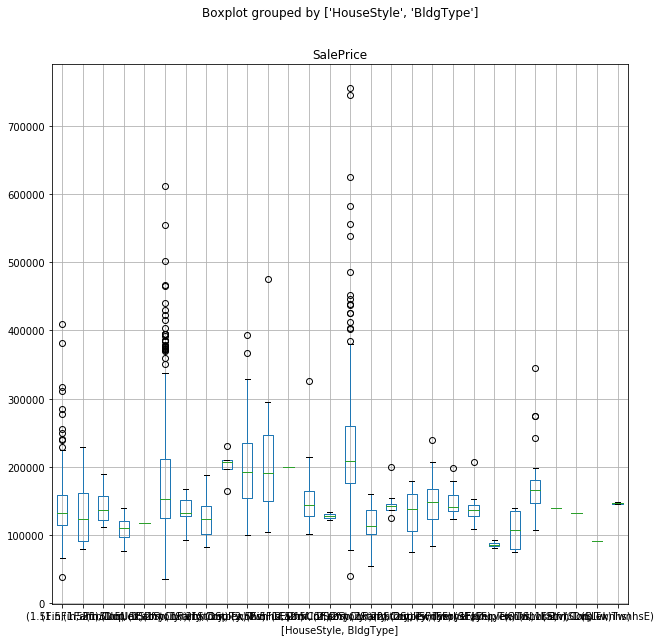

In [1076]:
col = ['HouseStyle', 'BldgType']

train_data.boxplot(column='SalePrice', by=col)

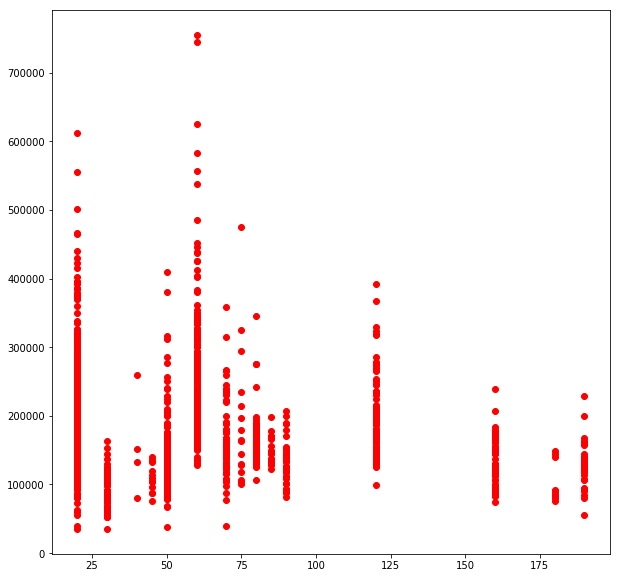

In [170]:
plt.plot(train_data['MSSubClass'], train_data['SalePrice'], 'ro')

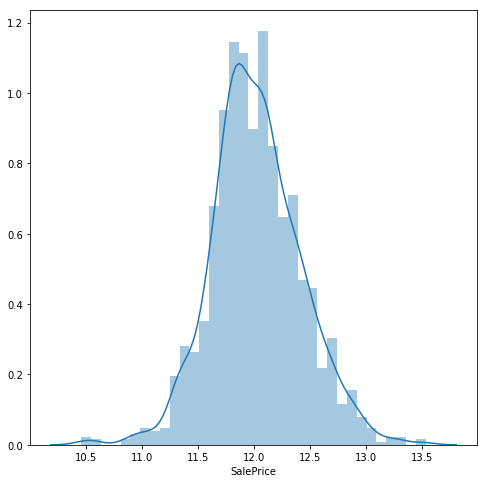

In [1323]:
sns.distplot(np.log(train_data['SalePrice']))

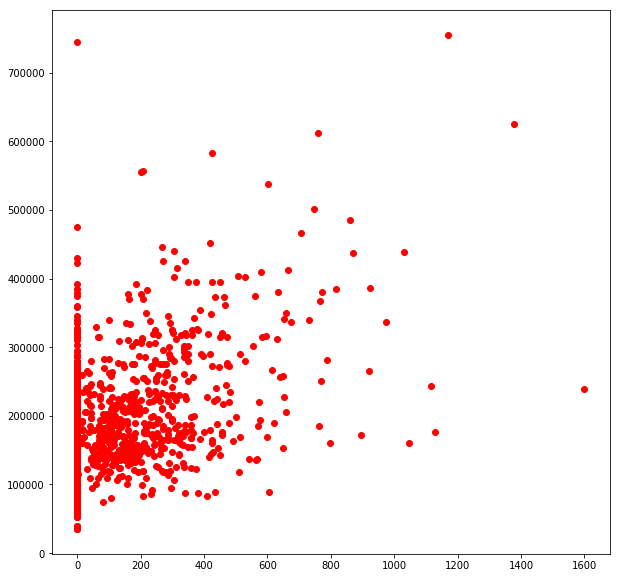

In [229]:
plt.plot(train_data['MasVnrArea'], train_data['SalePrice'], 'ro')

In [ ]:
# Numerical features transformations

#GrLivArea = 1stFlrSF + 2stFlrSF

['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'Fireplaces',
 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
#OneHotEncode MSSubclass
#IsBasement 1 
#isBasement 2 
#isBasemrnt unfinished
#isBasement
#issecondFloor
#hasLowQualityFinSF
#totalBasementBath
#totalBaths
#hasFireplace
#hasWoodddeck
#hasOpenPorch
#hasEnclosedPorch, 3SsnPorch, ScreenPorch
#hasPool
#hasMiscVal
#MoSold + YrSold to monthSold

In [ ]:
from pprint import pprint

def getCategoricalValueCounts(column):
    pprint(column.value_counts())
    
dummy = train_data.select_dtypes(include = ['O']).apply(getCategoricalValueCounts)

['MSZoning', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'condition1', 'condition2',
'BldgType', 'HouseType', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtExposure', 
'Electrical', 'GarageType', 'SaleType', 'SaleCondition']

['LotShape', 'ExterQual', 'ExterCond', 'BsmtQual', 'BasmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu'
 'GarageQual', 'GarageCond', 'PoolQC']
#MS zoning - One Hot Encode
#Street is Gravel Street
#Alley has Alley
#LotShape assign score  different
#LandContour onehotEncode
#Utilities remove
#LotConfig onehotencode
#LandSlope onehotencode
#Neighborhood onehotencode
#condition1 condition2 onehoeencode
#BldgType, HouseStyle, RoofStyle, Exterior1st, Exterior2nd onehotencode
#RoofMatl remove
#MasVnrType onehot encode
#ExterQual, assign score
#ExterCond, assign score
#Foundation, onehotencode
#BsmtQual, BsmtCond assign score
#BsmtExposure onehotencode
#BsmtFinType1, BsmtFinType2 assign score different
#Heating remove
#HeatingQC assign score
#CentralAir boolean
#Electrical Onehotencode
#KitchenQual assign score
#Functional isdeductions
#FireplaceQu assign score
#GarageType onehotencode
#GarageQual, GarageCond assign score
#PavedDrive assign score different
#PoolQC assign score
#Fence assign score different
#MiscFeature remove
#SaleType onehotencode
#SaleCondition onehotencode

In [ ]:
col = 'SaleCondition'

train_data.boxplot(column='SalePrice', by=col)

## Initial Try

In [72]:
dummy_train = train_data[high_corr_data]
y = train_data['SalePrice']

In [103]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(dummy_train, y, test_size=0.3, random_state=0 )

In [104]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
predict_y = reg.predict(test_X)

In [106]:
test_y_log = test_y.apply(np.log)
predict_y_log = np.log(predict_y)

In [108]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test_y_log, predict_y_log)**0.5

0.21175074424759885

In [1586]:
train_data[['LotArea','Electrical']].fillna([train_data[['LotArea', 'Electrical']].mode()])

TypeError: "value" parameter must be a scalar or dict, but you passed a "list"

In [1530]:
result = None
for c in ta.T:
    print c.shape
    print c
    if type(result) != np.ndarray:
        result = c
        print result
    else:
        
        result =np.append([result],[c], axis=0)
result.T

(1460,)
[ 8450  9600 11250 ...,  9042  9717  9937]
[ 8450  9600 11250 ...,  9042  9717  9937]


array([ 8450,  9600, 11250, ...,  9042,  9717,  9937])

In [ ]:
class CustomImputerWithNDArray(BaseEstimator, TransformerMixin):

    def __init__(self, strategy='mean',filler='NA'):
        self.strategy = strategy
        self.fill = filler
        
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):
        try:
            if type(X) == pd.DataFrame:
                if self.strategy == 'mean':
                    self.fill = [X[c].mean() for c in X]
                elif self.strategy == 'mode':
                    self.fill = [X[c].mode() for c in X]
                return self
            elif type(X) == pd.Series:
                if self.strategy == 'mean':
                    self.fill = X.mean()
                elif self.strategy == 'mode':
                    self.fill = X.mode()
                return self
            elif type(X) == np.ndarray:
                
                if self.strategy == 'mean':
                    self.fill = X.mean()
                if self.strategy == 'mode':
                    self.fill = stats.mode(X)[0]
                    print self.fill
        except Exception as e:
            raise ValueError(e)

    def transform(self, X, y=None):
        print self.fill
        if type(X) == np.ndarray:
            X_processed = None
            print self.fill
            for i,c in enumerate(X.T):
                c[pd.isnull(c)] = self.fill[0][i]
                if type(X_processed) == np.ndarray:
                    X_processed = np.append([X_processed],[c],axis=0)
                else:
                    X_processed = c
            return X_processed.T
        return X.fillna(self.fill)

### 0.211 is the base we have to improve from here

In [1843]:
#PIPELINE HELPERS

from sklearn_pandas import DataFrameMapper
from scipy import stats

class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='mean',filler='NA'):
        self.strategy = strategy
        self.fill = filler

    def fit(self, X, y=None):
        if self.strategy in ['mean','median']:
            if not all([dtype in [np.number, np.int] for dtype in X.dtypes]):
                raise ValueError('dtypes mismatch np.number dtype is \
                            required for '+ self.strategy)
        if self.strategy == 'mean':
            self.fill = X.mean()
        elif self.strategy == 'median':
            self.fill = X.median()
        elif self.strategy == 'mode':
            self.fill = X.mode().iloc[0]
        elif self.strategy == 'fill':
            if type(self.fill) is list and type(X) is pd.DataFrame:
                self.fill = dict([(cname, v) for cname,v in zip(X.columns, self.fill)])
        return self
    
    def transform(self, X, y=None):  
        if type(self.fill) == type(None):
            self.fill = 'NA'
        return X.fillna(self.fill)


def fillImputer(X, fill='NA'):
    if type(X) == pd.Series:
        print 'isseries'
        X_processed = X.fillna(fill)
    elif type(X) == np.ndarray:
        X[pd.isnull(X)] = fill
        X_processed = X
    else:
        X_processed = X.apply(lambda col: col.fillna(fill), axis=1)
    return X_processed

def extractColumns(X, columns):
    #print X.columns
    return X[columns]

def nonZeroToBoolean(X):
    bool_df = X.astype(bool).astype(int)
    bool_cols = [x+'_bool' for x in bool_df.columns]
    bool_df.columns = bool_cols
    return bool_df
    

def getAttrsSum(X, col_name='sum_col'):
    df =  pd.DataFrame(X.sum(axis=1), columns=[col_name])
    return df

def calculateSaleMonth(X):
    def calc(row):
        return (row['YrSold'] - 2000) * 12 + row['MoSold']
    return pd.DataFrame(X.apply(calc, axis=1), columns=['salemonth'])

def getColumnExtracter(columns):
    return FunctionTransformer(extractColumns,
                               validate=False,
                               kw_args={'columns': columns})


BooleanExtracter = FunctionTransformer(nonZeroToBoolean,
                                      validate=False,)

SaleMonthCalculator = FunctionTransformer(calculateSaleMonth,
                                         validate=False)

ColumnSummer = FunctionTransformer(getAttrsSum, validate=False)

LogTransformer = FunctionTransformer(lambda X: np.log(X), validate=False)

def getColSummerwithCol(col_name):
    return FunctionTransformer(getAttrsSum, validate=False, kw_args={'col_name': col_name })

def getFillImputer(fill='NA'):
     return FunctionTransformer(fillImputer, validate=False, kw_args={'fill': fill})
    
def getLabelBinarizerMapper(columns):
    return  DataFrameMapper(
        [(col, LabelBinarizer()) for col in columns]
    )
    


## Preprocess data

In [1539]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

from sklearn.pipeline import make_pipeline, make_union


In [1540]:
train_data.set_index('Id', inplace=True)
test_data.set_index('Id', inplace=True)

KeyError: 'Id'

In [1840]:
type(None)

NoneType

In [1541]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(train_data.drop('SalePrice', axis=1), train_data['SalePrice'],
                                                    test_size=0.3, random_state=10)

### clean data

In [1359]:
train_data.isnull().sum()[train_data.isnull().sum()!=0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
#remove Alley, FirePlaceQu, PoolQc, Fence, MiscFeature

In [1413]:
train_data['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [1700]:
train_X.columns


Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
       u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2',
       u'BldgType', u'HouseStyle', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'RoofStyle', u'RoofMatl',
       u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'MasVnrArea',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual',
       u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'FireplaceQu',
       u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars'

In [1791]:
train_data['Condition2'].value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

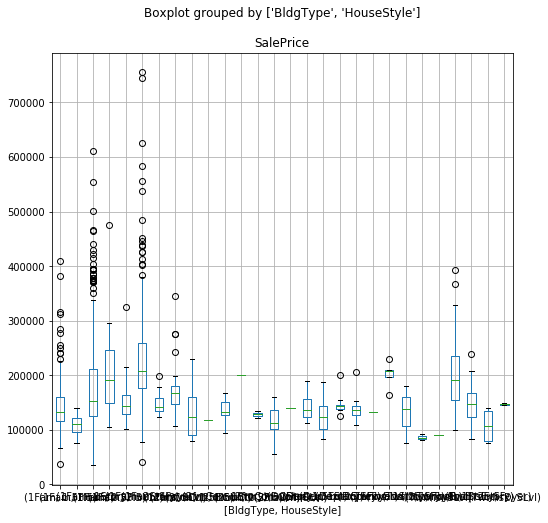

In [1795]:
train_data.boxplot(column=['SalePrice'], by=['BldgType','HouseStyle'])

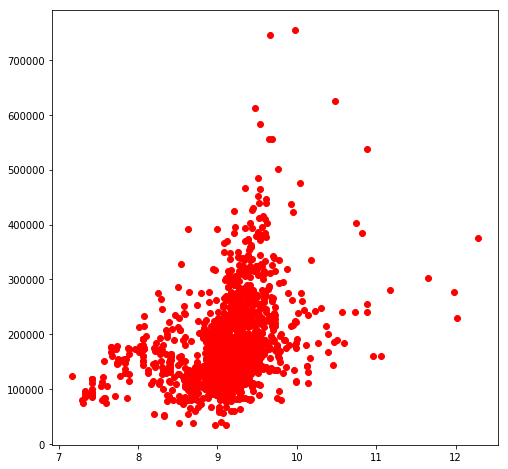

In [1724]:
plt.plot(np.log(train_data['LotArea']), train_data['SalePrice'], 'ro')

In [ ]:
pd.boxplot(col=['Sa'], by='Sale')

In [ ]:
# removed Street, Alley, Utilities

In [1801]:
data_cleaning_pipeline = make_union(
    make_pipeline(getColumnExtracter(['MasVnrType']),
                  getFillImputer('None')),
    
    make_pipeline(getColumnExtracter(['MasVnrArea', 'Electrical']),
                  CustomImputer(strategy='mode')),
    
    make_pipeline(getColumnExtracter(['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2']),
                 getFillImputer('NA')
                 ),
    
    make_pipeline(getColumnExtracter(['GarageType','GarageFinish','GarageQual','GarageCond']), 
                  getFillImputer('NA')
                 ),
    
    make_pipeline(getColumnExtracter(['GarageYrBlt']), 
                  CustomImputer(strategy='mean'))
)

In [1844]:

numerical_data_pipeline = make_union(
    make_pipeline(getColumnExtracter(['MSSubClass']),
                 CustomImputer(strategy='mode'),
                  getLabelBinarizerMapper(['MSSubClass'])
                 ),
    
    make_pipeline(getColumnExtracter(['LotFrontage']),
                 CustomImputer(strategy='mean')
                 ),
    
    make_pipeline(getColumnExtracter(['LotArea']),
                 CustomImputer(strategy='mean'),
                  LogTransformer
                 ),
)


In [1853]:
category_data_pipeline = make_union(
    make_pipeline(getColumnExtracter(['MSZoning']),
                 CustomImputer(strategy='mode'),
                 getLabelBinarizerMapper(['MSZoning'])
                 ),
    
    make_pipeline(getColumnExtracter(['LotShape']),
                 CustomImputer(strategy='mode'),
                  getLabelBinarizerMapper(['LotShape'])
                 ),
    
    make_pipeline(getColumnExtracter(['LandContour']),
                 CustomImputer(strategy='mode'),
                  getLabelBinarizerMapper(['LandContour'])
                 ),
    
    make_pipeline(getColumnExtracter(['LotConfig']),
                 CustomImputer(strategy='mode'),
                  getLabelBinarizerMapper(['LotConfig'])
                 ),
    
    make_pipeline(getColumnExtracter(['LandSlope']),
                 CustomImputer(strategy='mode'),
                  getLabelBinarizerMapper(['LandSlope'])
                 ),
    
    make_pipeline(getColumnExtracter(['Neighborhood']),
                 CustomImputer(strategy='fill', filler=['NA']),
                  getLabelBinarizerMapper(['Neighborhood'])
                 ),
        
    make_pipeline(getColumnExtracter(['Condition1', 'Condition2']),
                 CustomImputer(strategy='mode'),
                  getColSummerwithCol(col_name='Conditions'),
                  getLabelBinarizerMapper(['Conditions'])
                 ),
    
    make_pipeline(getColumnExtracter(['BldgType', 'HouseStyle']),
                 CustomImputer(strategy='mode'),
                  getColSummerwithCol(col_name='HouseBldgStyle'),
                  getLabelBinarizerMapper(['HouseBldgStyle'])
                 )
)

In [1854]:
numerical_data_pipeline.fit_transform(train_X)

array([[   0.        ,    1.        ,    0.        , ...,    0.        ,
          51.        ,    8.71931738],
       [   1.        ,    0.        ,    0.        , ...,    0.        ,
          79.        ,    9.27181169],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
         101.        ,    9.56205302],
       ..., 
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
          67.        ,    9.61233279],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
          50.        ,    9.10497986],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
          86.        ,    9.31154225]])

In [1855]:
category_data_pipeline.fit_transform(train_X)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Feature Selection Feature Union



In [1335]:
numerical_attrs = list(train_X.select_dtypes(include = [np.number]).columns)
numerical_attrs.remove('MSSubClass')
boolean_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'Fireplaces',
 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

#numerical_attrs = list(set(numerical_attrs) - set(boolean_cols))
print numerical_attrs



numerical_features = FeatureUnion([
    ('process_numerical_features', Pipeline([
        ('getnumnericalColumns', getColumnExtracter(numerical_attrs)),
    ])),
    ('get_boolean_features', Pipeline([
        ('getbooleanColumns', getColumnExtracter(boolean_cols)),
        ('booleanExtracter', BooleanExtracter),
        
    ])),
    ('get_sale_month', Pipeline([
        ('getSaleYearMonth', getColumnExtracter(['MoSold', 'YrSold'])),
        ('SaleMonthCalc', SaleMonthCalculator)
    ])),
    ('totalbaths', Pipeline([
        ('getBathsCol', getColumnExtracter(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'])),
        ('getTotal', ColumnSummer)
    ]))
])

processed_numnerical_features = make_pipeline(
    numerical_features,
    Imputer(strategy='most_frequent'),
    StandardScaler(),
    MinMaxScaler() 
)



['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [1336]:
oneHotColumns = ['MSZoning', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtExposure', 
'Electrical', 'GarageType', 'SaleType', 'SaleCondition']

oneHotColumns2 = ['MSSubClass', 'Neighborhood', 'SaleType', 'SaleCondition']

scoresColumns = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu'
 ,'GarageQual', 'GarageCond', 'PoolQC']

scoresColumns2 = ['BsmtFinType1', 'BsmtFinType2']

In [1337]:
nf = processed_numnerical_features.fit_transform(train_X)

## Categorical Features

In [1338]:
from sklearn.base import TransformerMixin, BaseEstimator



In [1339]:
oneHotColumns = ['MSZoning', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtExposure', 
'Electrical', 'GarageType', 'SaleType', 'SaleCondition']

oneHotColumns2 = ['MSSubClass', 'Neighborhood', 'SaleType', 'SaleCondition']

scoresColumns = ['HeatingQC', 'KitchenQual', 'FireplaceQu','GarageQual', 'GarageCond', 'PoolQC']

scoresColumns2 = ['BsmtFinType1', 'BsmtFinType2']

from sklearn.pipeline import make_pipeline, make_union
from sklearn_pandas import DataFrameMapper

def getQualityScore(X):
    def getScoreCol(col):
        score_map = {
            'Ex' : 5.0/5,
            'Gd' : 4.0/5,
            'TA' : 3.0/5,
            'Fa' : 2.0/5,
            'Po' : 1.0/5,
            np.nan : 0
        }
        return col.apply(lambda x: score_map[x])
    return X.apply(getScoreCol)

def getQualityScore2(X):
    def getScoreCol(col):
        score_map = {
            'GLQ': 6/6,
            'ALQ': 5/6,
            'BLQ': 4/6,
            'Rec': 3/6,
            'LwQ': 2/6,
            'Unf': 1/6,
            'NA':0
        }
        return col.apply(lambda x: score_map[x])
    return X.apply(getScoreCol)




def dfprinter(X):
    print X.head()
    
def getFunishedState(X):
    def getstate(col):
        return col.apply(lambda x: '')

QualityScoreGenerator = FunctionTransformer(getQualityScore, validate=False)

QualityScoreGenerator2 = FunctionTransformer(getQualityScore2, validate=False)
    
DataFramePrinter = FunctionTransformer(dfprinter, validate=False)

categorical_features = make_pipeline(
    make_pipeline(getColumnExtracter(oneHotColumns2+scoresColumns+scoresColumns2), DataFrameImputer()),
    #make_pipeline(getColumnExtracter(scoresColumns), DataFrameImputer()),
    make_union(
        getLabelBinarizerMapper(oneHotColumns2),
        make_pipeline(getColumnExtracter(scoresColumns), QualityScoreGenerator),
        make_pipeline(getColumnExtracter(scoresColumns2), QualityScoreGenerator2),
    )
)

category_combine_features = make_pipeline(
            make_union(
                make_pipeline(getColumnExtracter(['HouseStyle', 'BldgType']),
                              DataFrameImputer(),
                              getColSummerwithCol(col_name='houseBldg'),
                              DataFrameMapper([('houseBldg', LabelBinarizer())])
                ),
                #make_pipeline(getColumnExtracter(['BsmtQual', 'BsmtCond']),
                #              DataFrameImputer(),
                #              getColSummerwithCol(col_name='bsmtagg'),
                #              DataFrameMapper([('bsmtagg', LabelBinarizer())])
                #),
                #make_pipeline(getColumnExtracter(['ExterQual', 'ExterCond']),
                #              DataFrameImputer(),
                #              getColSummerwithCol(col_name='exteragg'),
                #             DataFrameMapper([('exteragg', LabelBinarizer())])
                #)
            )
        )



In [1340]:
#category_combine_features.fit_transform(train_X)

In [1341]:
#categorical_features.fit(train_X)

In [1342]:
#cf = categorical_features.transform(train_X)

## Process categorical features

In [1343]:
categorical_selection_pipeline = make_pipeline(
    make_union(categorical_features, category_combine_features),
    PCA(n_components=30)
)

In [1344]:
categorical_selection_pipeline.fit_transform(train_X).shape

(1022, 30)

## Combine all features

In [1345]:
#features = make_union(processed_numnerical_features, categorical_selection_pipeline)

In [1346]:
features = make_union(processed_numnerical_features, categorical_features, category_combine_features)

In [1347]:
features.fit_transform(train_X).shape

(1022, 141)

In [1856]:
new_features = make_union(numerical_data_pipeline, category_data_pipeline)

In [1859]:
new_features.fit_transform(train_X).shape

(1022, 108)

# Regressors

In [1851]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_validate

In [1860]:
from pprint import pprint

regs = [#LinearRegression(),
       #SVR(),
       #SGDRegressor(),
       #KNeighborsRegressor(),
       #DecisionTreeRegressor(max_depth=6, random_state=1),
       #ExtraTreeRegressor(max_depth=5, random_state=1),
       GradientBoostingRegressor(learning_rate=0.07, min_samples_leaf=3,
                                 min_samples_split=5 ,random_state=1,
                                 n_estimators = 700, subsample=0.7,
                                 max_leaf_nodes = 6
                                ),
       #AdaBoostRegressor(learning_rate=0.1, 
       #                  n_estimators=400, 
       #                  random_state=1,
       #                  loss='linear'),
       #MLPRegressor(hidden_layer_sizes=(100,), max_iter=4000, 
       #             learning_rate='invscaling', learning_rate_init=0.01,
       #             verbose=False
       # 
       xgb.XGBRegressor(silent=False, n_estimators=1300,
                    max_depth=3,
                    gamma=0.1,
                    learning_rate=0.02,
                    subsample=0.3,
                    colsample_bytree=0.3,
                    reg_alpha=1,
                    reg_lambda=1,
                    seed=1)
]

regression_pipeline = Pipeline([
    ('preprocessed_features', new_features),
    #('PCA', PCA(n_components=30)),
    #('generate_poly_features', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    #('Feature Selection', SelectKBest(chi2, k=100)),
    ('rgr', regs[0])
])

for reg in regs:
    regression_pipeline.set_params (rgr = reg)
    print '-----------------------'
    print str(reg)
    print '-----------------------'
    train_y_log = np.log(train_y)
    scores = cross_validate(regression_pipeline ,train_X, train_y, scoring='neg_mean_squared_log_error')
    pprint({
        'mean train score': (-scores['train_score'].mean()),
        'mean test score': (-scores['test_score'].mean()),
        'mean train root score': (-scores['train_score'].mean())**0.5,
        'mean test root score': (-scores['test_score'].mean())**0.5,
    })

-----------------------
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.07, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=6, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=5, min_weight_fraction_leaf=0.0,
             n_estimators=700, presort='auto', random_state=1,
             subsample=0.7, verbose=0, warm_start=False)
-----------------------
{'mean test root score': 0.2404901675593539,
 'mean test score': 0.057835520692726121,
 'mean train root score': 0.1188835825958014,
 'mean train score': 0.014133306210812734}
-----------------------
XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.3,
       gamma=0.1, learning_rate=0.02, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1300, nthread=-1,
       objective='reg:linear', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed

In [1220]:
from sklearn.metrics import make_scorer,mean_squared_log_error

def get_log_rmse(y, y_pred, **kwargs):
    score = mean_squared_log_error(y, y_pred)
    return (score)**0.5

log_rmse_scorer = make_scorer(get_log_rmse, greater_is_better= False)

In [1154]:
from sklearn.model_selection import GridSearchCV


regression_pipeline.set_params('rgr'=regs[-1])

cv_grid_rgr = GridSearchCV(regression_pipeline, param_grid={
    'rgr__max_depth' : (2,3,4),
    'rgr__min_child_weight' : (0.5)  
    'rgr__min_samples_leaf' : [2,3,4,5],
    'rgr__subsample' : [0.4,0.5,0.6,0.7,0.8,0.9]
}, verbose=10, scoring=log_rmse_scorer, n_jobs=4)

TypeError: set_params() takes exactly 1 argument (2 given)

In [293]:
cv_grid_rgr.fit(train_X, train_y)

Fitting 3 folds for each of 3840 candidates, totalling 11520 fits
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4 
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4 
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4 
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.17437281832, total=   2.4s
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.180125994187, total=   2.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsam

[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    6.0s


[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7 
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.183225560155, total=   3.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.151921608568, total=   3.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8 


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    9.7s


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.176920926475, total=   3.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.152752534419, total=   3.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.185003428126, total=   3.0s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.15230982

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   16.5s


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.16325772911, total=   3.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.153503121686, total=   3.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.164743208534, total=   3.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.139346441

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   21.6s


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.166407418285, total=   4.0s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.165150289287, total=   3.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.139876585816, total=   4.0s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.16488872

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   33.1s


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.166258197584, total=   4.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.16572664995, total=   5.0s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.142422633006, total=   5.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.146546131

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   46.1s


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.148390670161, total=   6.0s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.153707104494, total=   6.0s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.130256720806, total=   5.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.14728662

[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  1.1min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.131688532701, total=   6.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.15345608688, total=   5.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.14385886122, total=   6.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.1298129807

[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.4min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.152303045518, total=   8.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.129642162987, total=   7.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.144041699939, total=   7.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.15214677

[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  1.6min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.18370898055, total=   2.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.176956790033, total=   3.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.151921608568, total=   2.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.183225560

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  1.8min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.16325772911, total=   3.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.164743208534, total=   3.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.13934644175, total=   2.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.1637942229

[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  2.1min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.16572664995, total=   4.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.142422633006, total=   4.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.146546131456, total=   4.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.155207849

[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  2.4min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.147665866587, total=   6.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.154371682696, total=   6.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.130050645922, total=   5.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.14862042

[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  2.8min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.129642162987, total=   6.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.144041699939, total=   6.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.152146772975, total=   7.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.12806009

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.2min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.176920926475, total=   3.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.152752534419, total=   3.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.185003428126, total=   3.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.17659976

[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  3.5min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.140794271928, total=   3.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.165827524052, total=   3.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.165103362367, total=   3.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.14038446

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.9min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.147665866587, total=   5.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.129977342689, total=   5.2s
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.154386467902, total=   5.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9 
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.14872623

[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed:  4.4min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.1448683534, total=   6.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.153132578464, total=   6.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.17908116095, total=   2.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.17426992922

[Parallel(n_jobs=4)]: Done 234 tasks      | elapsed:  4.6min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.162679169271, total=   3.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.164559085649, total=   3.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.140048116037, total=   3.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.16476582

[Parallel(n_jobs=4)]: Done 257 tasks      | elapsed:  5.0min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.148375143338, total=   5.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.153661241311, total=   5.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.130119655553, total=   5.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.14724035

[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  5.6min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.129758090969, total=   5.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.152229256668, total=   6.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.143925519928, total=   5.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.15215614

[Parallel(n_jobs=4)]: Done 305 tasks      | elapsed:  6.0min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.161977837061, total=   3.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.162236755542, total=   2.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.141022619748, total=   2.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.16370083

[Parallel(n_jobs=4)]: Done 330 tasks      | elapsed:  6.4min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.147617631769, total=   4.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.154502313387, total=   5.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.131553546425, total=   5.0s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.14949831

[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  7.1min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.14652508024, total=   6.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.179014451, total=   2.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.15301320205, total=   6.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.172311027916,

[Parallel(n_jobs=4)]: Done 384 tasks      | elapsed:  7.4min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.16420419982, total=   4.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.165482919267, total=   4.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.140199617856, total=   4.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.166130457

[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4 
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5 


[Parallel(n_jobs=4)]: Done 413 tasks      | elapsed:  8.2min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.134093834362, total=   6.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.152479935519, total=   6.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.131047106103, total=   5.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.14318002

[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  8.7min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.176844564612, total=   3.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.154051641095, total=   3.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.185384180247, total=   3.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.17630247

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.147218825147, total=   4.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.155603922959, total=   4.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6 


[Parallel(n_jobs=4)]: Done 473 tasks      | elapsed:  9.2min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.133019728046, total=   4.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.147617631769, total=   4.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.154502313387, total=   5.0s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.13155354

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.15301320205, total=   6.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.179014451, total=   2.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.5 


[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:  9.9min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.131899021069, total=   5.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.172311027916, total=   2.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.152685187389, total=   2.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.18132258

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.142620760563, total=   3.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.166753752867, total=   3.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.165036903211, total=   3.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.14305689

[Parallel(n_jobs=4)]: Done 537 tasks      | elapsed: 10.4min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.167636795231, total=   4.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.165888098267, total=   4.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.144651139161, total=   5.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.14664423

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.152639413563, total=   5.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.145068506413, total=   5.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.152727357028, total=   6.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.13142233

[Parallel(n_jobs=4)]: Done 570 tasks      | elapsed: 11.2min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.152274892392, total=   6.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.13170502115, total=   5.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.178463810974, total=   2.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.146525080

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.165569222676, total=   3.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.164618214301, total=   3.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.140799623959, total=   3.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.16592492

[Parallel(n_jobs=4)]: Done 605 tasks      | elapsed: 11.7min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.143307699093, total=   3.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.167419277187, total=   3.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.165359713987, total=   3.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.14302757

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.152956749198, total=   5.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.132128801112, total=   5.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.144783852293, total=   5.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.15371894

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed: 12.4min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.152826929262, total=   5.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.132736988661, total=   6.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.146568225765, total=   5.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.15312954

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.162628281053, total=   3.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.163639094467, total=   3.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.142549482348, total=   3.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.16556922

[Parallel(n_jobs=4)]: Done 677 tasks      | elapsed: 13.0min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.143307699093, total=   3.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.167419277187, total=   3.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.165359713987, total=   3.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.14302757

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.152956749198, total=   5.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.132128801112, total=   5.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.144783852293, total=   5.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.15371894

[Parallel(n_jobs=4)]: Done 714 tasks      | elapsed: 13.8min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.146568225765, total=   5.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.153129549883, total=   6.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.132700055452, total=   5.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.17846381

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.142549482348, total=   3.0s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.165569222676, total=   3.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.164618214301, total=   3.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.14079962

[Parallel(n_jobs=4)]: Done 753 tasks      | elapsed: 14.4min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.166175030929, total=   4.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.145240768394, total=   3.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.146559554256, total=   3.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.15347970

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.146191494394, total=   5.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.152826929262, total=   5.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.132736988661, total=   5.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.14656822

[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 15.2min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.133312443328, total=   5.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.170660310572, total=   2.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.151701412667, total=   2.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.17999805

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.143307699093, total=   3.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.167419277187, total=   3.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.165359713987, total=   3.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.14302757

[Parallel(n_jobs=4)]: Done 833 tasks      | elapsed: 15.8min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.134084394571, total=   4.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.148675781595, total=   4.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.155567928333, total=   5.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.13179081

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.154212624662, total=   7.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.176935947488, total=   2.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.133312443328, total=   7.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.16871561

[Parallel(n_jobs=4)]: Done 874 tasks      | elapsed: 16.7min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.174789379323, total=   2.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.1538895792, total=   2.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.184592841153, total=   2.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.1755040002

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.145724781497, total=   5.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.154212551762, total=   4.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.133876051225, total=   4.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.14740304

[Parallel(n_jobs=4)]: Done 917 tasks      | elapsed: 17.5min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.137001136046, total=   6.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.142210954534, total=   4.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.151974011771, total=   5.0s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.13188974

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.174789379323, total=   3.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.1538895792, total=   3.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.184592841153, total=   3.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.1755040002

[Parallel(n_jobs=4)]: Done 960 tasks      | elapsed: 18.4min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.163708354419, total=   3.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.163065455925, total=   3.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.141155772294, total=   3.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.16397699

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.137001136046, total=   5.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.142210954534, total=   4.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.151974011771, total=   4.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.13188974

[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed: 19.5min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.176935947488, total=   2.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.14788115379, total=   5.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.153351000276, total=   6.1s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.168715616

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.141155772294, total=   3.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.163976997301, total=   3.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.163121675259, total=   3.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.14282589

[Parallel(n_jobs=4)]: Done 1050 tasks      | elapsed: 20.1min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.147403044996, total=   4.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.154470685044, total=   4.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.132701829892, total=   4.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.14893883

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.134892693007, total=   6.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.153351000276, total=   6.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.168715616232, total=   2.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.15032320

[Parallel(n_jobs=4)]: Done 1097 tasks      | elapsed: 21.0min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.156038294591, total=   3.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.159742285427, total=   2.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.15943247153, total=   3.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.139576980

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.153684651175, total=   5.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.134384932119, total=   5.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.150549981948, total=   5.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.15519888

[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed: 21.9min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.151805953074, total=   6.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.14690091737, total=   6.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.132542974758, total=   6.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.01, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.153385518

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.140658495803, total=   3.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.129552941635, total=   3.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.151431803843, total=   3.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.14219465

[Parallel(n_jobs=4)]: Done 1193 tasks      | elapsed: 22.9min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.127997513544, total=   6.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.13856378653, total=   6.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.148267430269, total=   6.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.126845250

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.138536921023, total=   5.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.148231306208, total=   6.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.156221128463, total=   2.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.13094690

[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 23.9min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.139256895062, total=   2.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.153938641589, total=   3.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.127963799468, total=   3.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.14065849

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.127888130875, total=   5.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.136307316235, total=   5.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.149668870655, total=   5.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.12544665

[Parallel(n_jobs=4)]: Done 1293 tasks      | elapsed: 24.9min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.138536921023, total=   6.0s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.148231306208, total=   5.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.146097934858, total=   2.2s
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.127482608254, total=   5.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=300, 

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.129060063173, total=   4.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.141729580986, total=   4.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.149254898816, total=   4.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.12883691

[Parallel(n_jobs=4)]: Done 1344 tasks      | elapsed: 25.8min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.136259553627, total=   7.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.149954539435, total=   7.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.125615282188, total=   6.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.13917551

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.132806206826, total=   2.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.147172564358, total=   2.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.155713686534, total=   2.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.13109828

[Parallel(n_jobs=4)]: Done 1397 tasks      | elapsed: 26.8min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.129351471316, total=   3.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.141204607779, total=   4.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.152859611259, total=   4.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.12783971

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.14745397794, total=   6.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.127316621408, total=   6.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.137271377024, total=   5.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.147876289

[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed: 27.9min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.153801595658, total=   2.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.133997349057, total=   2.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.148777089192, total=   2.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.15453514

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.13903079068, total=   4.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.147210418518, total=   4.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.128813869679, total=   4.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.137546877

[Parallel(n_jobs=4)]: Done 1505 tasks      | elapsed: 28.9min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.128531283777, total=   5.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.137577195858, total=   5.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.147532676776, total=   5.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.12751443

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.15072909831, total=   3.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.130268234266, total=   3.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.140948969811, total=   3.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.131139883

[Parallel(n_jobs=4)]: Done 1560 tasks      | elapsed: 29.8min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.138454798723, total=   5.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.148184986459, total=   4.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.128094225105, total=   4.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.13929775

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.132944073591, total=   3.1s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.147326901019, total=   3.1s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.154134040783, total=   3.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.14914003

[Parallel(n_jobs=4)]: Done 1617 tasks      | elapsed: 31.0min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.151399346951, total=   4.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.129656710514, total=   4.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.148776730467, total=   4.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.13988057

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.138401307704, total=   5.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.146858407416, total=   5.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.128531283777, total=   5.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.13757719

[Parallel(n_jobs=4)]: Done 1674 tasks      | elapsed: 32.1min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.142428510378, total=   3.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.151584881957, total=   2.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.127556000683, total=   2.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.14192708

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.12876067678, total=   5.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.138454798723, total=   5.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.148184986459, total=   5.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.128094225

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.147689648835, total=   2.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.155660066607, total=   2.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7 


[Parallel(n_jobs=4)]: Done 1733 tasks      | elapsed: 33.2min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.147672132462, total=   2.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.1548340214, total=   3.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.135988811118, total=   3.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.1503327047

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.132117263482, total=   3.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.137998297042, total=   3.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.147307213437, total=   4.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.12815481

[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 34.2min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.148799059166, total=   5.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.130175480038, total=   5.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.13823975768, total=   5.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.148360113

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.141380187116, total=   3.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.152508573011, total=   3.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.129594209028, total=   3.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.14156006

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.128426886716, total=   5.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.139759785091, total=   5.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.150150037172, total=   5.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4 


[Parallel(n_jobs=4)]: Done 1853 tasks      | elapsed: 35.3min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.12946924234, total=   5.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.137654919041, total=   4.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.147581133976, total=   4.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.127844906

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.154651550434, total=   2.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.135548455189, total=   2.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.150180825756, total=   2.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.15489006

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.137401233042, total=   4.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.150609731223, total=   4.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.127800916669, total=   4.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 


[Parallel(n_jobs=4)]: Done 1914 tasks      | elapsed: 36.3min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.137553590557, total=   4.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.149259396525, total=   4.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.131980717108, total=   4.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.13830911

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.14627769354, total=   2.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.128647071127, total=   5.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.151723900217, total=   2.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.132762235

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.151296159699, total=   3.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.132420351663, total=   3.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.143797970571, total=   3.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.15143239

[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed: 37.4min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.152316583872, total=   3.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.132117263482, total=   3.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.137998297042, total=   4.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.14730721

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.137655684173, total=   5.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.148799059166, total=   5.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.130175480038, total=   5.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.13823975

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.129892669464, total=   2.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.140993249116, total=   3.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.154228947514, total=   3.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.13121528

[Parallel(n_jobs=4)]: Done 2040 tasks      | elapsed: 38.5min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.140697473496, total=   3.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.151808000285, total=   3.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.129842682075, total=   3.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.14358000

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.130728603432, total=   4.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.135662486027, total=   4.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.148654096164, total=   4.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.12977168

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.154661082932, total=   2.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.136446380101, total=   2.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.151149190108, total=   2.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.15623056

[Parallel(n_jobs=4)]: Done 2105 tasks      | elapsed: 39.7min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.136282669313, total=   2.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.140115996771, total=   2.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.150837757341, total=   3.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.12989266

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.149261681319, total=   4.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.131217893649, total=   4.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.140072240132, total=   4.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.15018246

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.146266916813, total=   2.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.13410428534, total=   2.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.157184790566, total=   2.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.147026872

[Parallel(n_jobs=4)]: Done 2170 tasks      | elapsed: 40.8min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.154661082932, total=   2.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.136446380101, total=   2.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.151149190108, total=   2.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.15623056

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.137530376708, total=   4.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.15251970791, total=   4.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.129862249478, total=   4.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.136720766

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.130224321235, total=   5.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.140992327124, total=   5.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.148841635022, total=   5.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.14426709

[Parallel(n_jobs=4)]: Done 2237 tasks      | elapsed: 42.0min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.13410428534, total=   2.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.147026872627, total=   2.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.155147950291, total=   2.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.132903955

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.151897589128, total=   3.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.133236119785, total=   3.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.13650668547, total=   4.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.148197256

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.137990375324, total=   6.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.149047692275, total=   5.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.130827098593, total=   5.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.13918440

[Parallel(n_jobs=4)]: Done 2304 tasks      | elapsed: 43.3min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.02, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.129833376424, total=   6.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.130198989434, total=   2.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.153316137981, total=   2.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.13888636

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.129731631408, total=   3.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.139763363095, total=   3.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.150037565656, total=   3.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.12795551

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.147601175457, total=   5.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.125957610636, total=   5.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.136328532981, total=   6.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.14484973

[Parallel(n_jobs=4)]: Done 2373 tasks      | elapsed: 44.6min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.135755110399, total=   6.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.139512789516, total=   2.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.148741935433, total=   6.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.12548144

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.12763867469, total=   3.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.140362428306, total=   3.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.148677988989, total=   3.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.129731631

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.148916310682, total=   4.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.127961700038, total=   4.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.135116283693, total=   5.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.14760117

[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 45.9min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.148333695529, total=   6.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.127999745738, total=   5.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.139109410696, total=   2.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.13575511

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.139625066843, total=   3.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.145967118304, total=   3.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.128617837392, total=   3.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.14034854

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.127188998616, total=   5.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.139488842089, total=   4.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.148969963577, total=   4.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.12768359

[Parallel(n_jobs=4)]: Done 2513 tasks      | elapsed: 47.2min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.130615727014, total=   5.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.137745401424, total=   6.0s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.149174288307, total=   6.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.12839035

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.149185586023, total=   3.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.128128144863, total=   4.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.141055948064, total=   4.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.14611783

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.136093158052, total=   5.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.149558787849, total=   5.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.126256963379, total=   5.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.13796521

[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed: 48.6min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.147334040828, total=   5.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.131277976048, total=   5.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.137407053033, total=   5.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.14894652

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.148598459384, total=   3.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.137622266542, total=   3.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.128330009097, total=   3.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.13858875

[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9 
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.138730542641, total=   5.0s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.148531976288, total=   5.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.139502068188, total=   4.5s
[CV] rgr__min_samp

[Parallel(n_jobs=4)]: Done 2657 tasks      | elapsed: 49.9min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.130055786634, total=   6.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.139040227617, total=   5.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.149176481527, total=   6.0s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.12569744

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.148598459384, total=   3.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.128330009097, total=   3.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.138588759884, total=   3.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.14808585

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.138730542641, total=   5.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.148531976288, total=   4.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.128561885425, total=   4.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.13950206

[Parallel(n_jobs=4)]: Done 2730 tasks      | elapsed: 51.2min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.149176481527, total=   5.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.125697449543, total=   6.0s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.148137903042, total=   6.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.13893706

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.138588759884, total=   3.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.148085853218, total=   3.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.130085171883, total=   3.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.13976244

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.139502068188, total=   4.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.128561885425, total=   4.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.147715686827, total=   4.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.12701021

[Parallel(n_jobs=4)]: Done 2805 tasks      | elapsed: 52.6min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.138937063362, total=   5.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.148137903042, total=   5.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.14076959315, total=   2.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.127987133

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.130085171883, total=   3.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.139762442448, total=   3.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.14767079923, total=   3.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.130922377

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.147715686827, total=   4.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.12701021083, total=   4.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.13704968753, total=   5.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.1476103632

[Parallel(n_jobs=4)]: Done 2880 tasks      | elapsed: 53.9min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.150089467256, total=   2.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.127987133144, total=   5.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.130671155438, total=   2.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.14123123

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.130954540403, total=   3.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.140193032477, total=   3.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.149609346223, total=   3.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.12983608

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.14872112539, total=   5.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.129438611357, total=   5.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.135915647423, total=   5.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.148548184

[Parallel(n_jobs=4)]: Done 2957 tasks      | elapsed: 55.2min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.130874204435, total=   2.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.140261270572, total=   2.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.150617354888, total=   2.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.13026787

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.150030247745, total=   3.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.129836337177, total=   3.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.13774970047, total=   4.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.129445459

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.137471762986, total=   5.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.149763444889, total=   5.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.129439383113, total=   6.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.13870594

[Parallel(n_jobs=4)]: Done 3034 tasks      | elapsed: 56.5min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.151624817015, total=   3.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.132735390954, total=   3.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.142398951326, total=   3.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.15114193

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.138136246412, total=   5.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.148308222533, total=   4.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.12943991004, total=   4.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.136316428

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.128110623071, total=   5.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.138428640819, total=   5.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.149239535876, total=   5.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_sam

[Parallel(n_jobs=4)]: Done 3113 tasks      | elapsed: 58.1min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.131104112577, total=   2.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.139855585327, total=   2.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.148784461892, total=   2.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.12983251

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.149733552871, total=   5.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.129858990016, total=   4.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.138749728704, total=   5.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.14864535

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.139427250425, total=   2.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.151052001804, total=   2.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.132587634208, total=   2.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.14048429

[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 59.5min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.139035138043, total=   3.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.1498446044, total=   3.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.130277273174, total=   3.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.1398736653

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.128943368355, total=   5.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.137409711501, total=   5.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.149305803823, total=   5.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.13072819

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.150740849354, total=   2.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.131531579071, total=   2.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.143077838103, total=   2.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.15012646

[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed: 60.9min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.140976308201, total=   3.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.149060668282, total=   3.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.1309195128, total=   3.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.1374842408

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.129257178346, total=   5.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.137738433217, total=   5.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.148722737987, total=   5.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.12906391

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.150862423236, total=   2.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.13001446522, total=   2.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.138409664983, total=   3.0s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.150244963

[Parallel(n_jobs=4)]: Done 3354 tasks      | elapsed: 62.3min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.137686777536, total=   4.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.148717193653, total=   4.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.129757377092, total=   4.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.13755342

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.147989783077, total=   5.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.151421373057, total=   2.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.128578310616, total=   5.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.13118008

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.149595686073, total=   3.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.130008571758, total=   3.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.14116649947, total=   3.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.148745700

[Parallel(n_jobs=4)]: Done 3437 tasks      | elapsed: 63.8min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.128943368355, total=   6.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.137409711501, total=   5.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.149305803823, total=   5.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.03, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.13072819

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.147472722584, total=   2.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.12982732983, total=   2.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.137615964235, total=   2.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.151833441

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.138082602976, total=   4.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.144044873687, total=   4.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.12718455182, total=   4.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.137374993

[Parallel(n_jobs=4)]: Done 3520 tasks      | elapsed: 65.3min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.146704549187, total=   5.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.129593201529, total=   5.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.136202329258, total=   5.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.15046930

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.137539735598, total=   3.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.145455366212, total=   3.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.127618738438, total=   3.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.13785610

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.125864486423, total=   5.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.136076656628, total=   4.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.147158216633, total=   5.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.12906983

[Parallel(n_jobs=4)]: Done 3605 tasks      | elapsed: 66.8min


[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.138330305226, total=   2.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.149566584901, total=   2.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.128753365399, total=   2.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_sam

[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.128946472943, total=   4.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.140617873222, total=   4.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.148862194283, total=   4.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_sam

[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.147155858812, total=   5.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.128429646165, total=   5.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.136787459703, total=   5.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_sam

[Parallel(n_jobs=4)]: Done 3690 tasks      | elapsed: 68.3min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.139193757851, total=   2.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.148754841247, total=   3.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.127971291483, total=   2.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.13832483

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.12675166673, total=   4.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.137097821304, total=   4.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.150678001574, total=   4.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.127339706

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.147363362334, total=   2.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.128288191495, total=   2.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.146754119243, total=   2.9s
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.138033583734, total=   3.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=300, 

[Parallel(n_jobs=4)]: Done 3777 tasks      | elapsed: 69.9min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.139806375177, total=   4.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.12927695086, total=   4.5s
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.148318393967, total=   4.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4 
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.139537482

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.129353014791, total=   6.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.139865051937, total=   5.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.145775978363, total=   5.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.12672972

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.148746091138, total=   2.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.128347919572, total=   2.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.138263839547, total=   3.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.14664208

[Parallel(n_jobs=4)]: Done 3864 tasks      | elapsed: 71.5min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.136579133374, total=   4.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.148307000429, total=   4.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.128652808164, total=   4.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.13888905

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.128288191495, total=   2.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.138033583734, total=   2.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.146754119243, total=   2.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.13040902

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.148318393967, total=   3.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.12927695086, total=   3.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.139537482267, total=   4.1s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.147816061

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.139865051937, total=   5.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.145775978363, total=   5.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8 


[Parallel(n_jobs=4)]: Done 3953 tasks      | elapsed: 73.1min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.126729722791, total=   5.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.136828557384, total=   5.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.148398063876, total=   5.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.12879644

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.146642080364, total=   3.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.127999955574, total=   3.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.137552426094, total=   3.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.14613714

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.138889056702, total=   5.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.147218697497, total=   4.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.140101960506, total=   4.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.12826229

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.128979242145, total=   2.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.139179910639, total=   3.0s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8 


[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 74.6min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.148484166338, total=   3.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.132402348034, total=   3.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.141133761138, total=   3.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.14966636

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.139729010559, total=   4.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.148020967834, total=   4.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.127973053908, total=   4.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.13861907

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.129585330143, total=   5.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.138239967646, total=   5.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.129695831072, total=   5.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.13832514

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.148482172616, total=   3.7s
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.128291237161, total=   3.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8 
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.138129235203, total=   3.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.14750968

[Parallel(n_jobs=4)]: Done 4133 tasks      | elapsed: 76.2min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.131220744652, total=   3.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.140248660641, total=   3.3s
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.149058333581, total=   3.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.12970221

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.127626381604, total=   5.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.148349812828, total=   5.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.138826119568, total=   5.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.14774477

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.139366957963, total=   2.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.149958682964, total=   2.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.132024044141, total=   2.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.13827127

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.137488449059, total=   4.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.12800373336, total=   4.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.147810379026, total=   4.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.130143561

[Parallel(n_jobs=4)]: Done 4224 tasks      | elapsed: 77.8min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.138997980934, total=   4.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.14859260495, total=   4.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.129430503554, total=   4.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.138103613

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.127724724605, total=   2.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.141011388203, total=   2.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.14932388162, total=   2.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.128979242

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.149037478537, total=   3.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.130638565789, total=   3.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.13988824994, total=   4.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.147919363

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.137625336165, total=   5.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.147796757383, total=   5.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.130156347886, total=   5.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.13908044

[Parallel(n_jobs=4)]: Done 4317 tasks      | elapsed: 79.5min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.138239967646, total=   5.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.135696441407, total=   2.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.148858014937, total=   5.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.15118319

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.130483505157, total=   3.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.139269305085, total=   3.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.148958798326, total=   3.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.13069278

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.15128680193, total=   4.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.130852470645, total=   4.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.138610173294, total=   4.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.151670039

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.141999782955, total=   3.2s
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.149252059137, total=   3.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.131689498413, total=   3.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.14182936

[Parallel(n_jobs=4)]: Done 4410 tasks      | elapsed: 81.0min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.134966628016, total=   3.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.150685832757, total=   3.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.128856878387, total=   3.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.13884539

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.129418109511, total=   5.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.141277448497, total=   6.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.148483233849, total=   5.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.12988602

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.150771354924, total=   2.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.132872082677, total=   2.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.139977608873, total=   2.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.14683732

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.141353836911, total=   3.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.148729003457, total=   3.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.131610374927, total=   3.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.13499166

[Parallel(n_jobs=4)]: Done 4505 tasks      | elapsed: 82.8min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.132609363769, total=   4.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.138430189924, total=   5.0s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.145339025227, total=   5.1s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.12981545

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.135696441407, total=   2.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.15118319141, total=   2.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.148295928053, total=   5.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.128688036

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.139269305085, total=   3.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.148958798326, total=   3.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.130692783301, total=   3.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.14123239

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.130852470645, total=   4.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.138610173294, total=   5.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.151670039944, total=   5.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.13348293

[Parallel(n_jobs=4)]: Done 4600 tasks      | elapsed: 84.5min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.149063819704, total=   5.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.129096549249, total=   5.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.14175814488, total=   5.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.04, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.148946010

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.136440943511, total=   3.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.147984405503, total=   3.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.124337024626, total=   3.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.14113840

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.126925467687, total=   5.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.137825184105, total=   4.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.150693228847, total=   4.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.12820346

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.145588679879, total=   2.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.128939691413, total=   2.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.139526633366, total=   2.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.14567696

[Parallel(n_jobs=4)]: Done 4697 tasks      | elapsed: 86.1min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.128404183608, total=   2.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.141935576272, total=   2.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.152170218344, total=   2.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.12557140

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.144443899732, total=   5.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.127717782067, total=   5.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.1354659421, total=   5.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.1468675505

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.139322936785, total=   2.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.148175650378, total=   2.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.124904926383, total=   2.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.14087555

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.126911944752, total=   3.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.137987564672, total=   3.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.151350442305, total=   3.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.12765929

[Parallel(n_jobs=4)]: Done 4794 tasks      | elapsed: 87.8min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.140132345901, total=   4.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.143359350249, total=   4.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.129121434672, total=   4.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.13795339

[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.150972440863, total=   5.4s
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.127692122443, total=   5.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.153904925282, total=   2.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.12899942

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.145111997681, total=   3.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.128894172294, total=   3.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.134220016781, total=   3.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.14666695

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.140288428299, total=   5.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.150849464903, total=   5.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.126072630677, total=   4.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.14002225

[Parallel(n_jobs=4)]: Done 4893 tasks      | elapsed: 89.6min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.138956243074, total=   5.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.139652514605, total=   2.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.150989574883, total=   5.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.15087844

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.130331370611, total=   3.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.140414589591, total=   3.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.145504894045, total=   3.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.12806092

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.147546501338, total=   5.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.130572812433, total=   6.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.140191386256, total=   5.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.14825471

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.140323059709, total=   2.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.150505826362, total=   2.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.130731298066, total=   2.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.13949477

[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed: 91.5min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.144714882433, total=   3.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.130331370611, total=   3.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.140414589591, total=   3.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.14550489

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.147546501338, total=   4.7s
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.142368907462, total=   4.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5 
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.130572812433, total=   4.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.14019138

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.128558211383, total=   2.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.140323059709, total=   2.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.150505826362, total=   2.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.13073129

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.148222080509, total=   4.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.128732665401, total=   4.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.140394005089, total=   4.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.14432334

[Parallel(n_jobs=4)]: Done 5093 tasks      | elapsed: 93.3min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.128165608403, total=   4.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.142368907462, total=   4.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.147546501338, total=   4.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.13057281

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.146256195848, total=   2.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.128558211383, total=   2.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.140323059709, total=   2.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.15050582

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.140315759616, total=   4.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.148222080509, total=   4.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.140394005089, total=   4.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.12873266

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.128991953039, total=   6.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.137985373182, total=   2.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.139377046907, total=   6.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.14783859

[Parallel(n_jobs=4)]: Done 5194 tasks      | elapsed: 95.2min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.149019280311, total=   3.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.131050181336, total=   3.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.139499191378, total=   3.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.14801731

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.13957669645, total=   4.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.149376452321, total=   4.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6 
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.127905930442, total=   4.6s
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.136715053

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.128214990228, total=   6.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.137838232522, total=   5.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.137985373182, total=   2.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.14987657

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.147801822943, total=   3.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.13070681348, total=   3.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.139219260511, total=   3.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.148192094

[Parallel(n_jobs=4)]: Done 5297 tasks      | elapsed: 97.0min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.127905930442, total=   4.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.136715053482, total=   4.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.147974634699, total=   4.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.13063243

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.137985373182, total=   2.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.149876575365, total=   2.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.149761278241, total=   5.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.12634623

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.139219260511, total=   3.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.14819209461, total=   3.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.129557988126, total=   3.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.138813700

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.132629318606, total=   4.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.139718528722, total=   5.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.149721316176, total=   5.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.12819057

[Parallel(n_jobs=4)]: Done 5400 tasks      | elapsed: 98.9min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.126346231315, total=   5.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.149876575365, total=   2.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.131793182203, total=   2.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.13998316

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.129557988126, total=   3.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.138813700609, total=   3.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.14739733362, total=   3.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.128252401

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.149721316176, total=   6.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.128190577391, total=   5.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.137381119591, total=   6.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.14879891

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.139263808711, total=   2.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.14950332617, total=   3.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.130812696795, total=   3.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.140640141

[Parallel(n_jobs=4)]: Done 5505 tasks      | elapsed: 100.7min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.140178385281, total=   3.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.149578860038, total=   3.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.130308198304, total=   3.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.14241426

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.131051433716, total=   5.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.139479122263, total=   5.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.149862912105, total=   5.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.12932314

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.150855543262, total=   2.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.129713173733, total=   2.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.138589847419, total=   3.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.14984904

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.13997246348, total=   4.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.149013021031, total=   4.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.129674030888, total=   4.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.139972415

[Parallel(n_jobs=4)]: Done 5610 tasks      | elapsed: 102.7min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.139699403339, total=   7.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.149321545527, total=   6.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.129741036604, total=   6.0s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.13964092

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.13144188365, total=   3.1s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.142122012238, total=   3.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.148212186148, total=   3.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.131017085

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.150046954564, total=   4.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.129997401183, total=   4.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.142684734168, total=   4.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.15261563

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.140932741005, total=   2.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.149845828753, total=   3.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.130474008379, total=   3.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.14053610

[Parallel(n_jobs=4)]: Done 5717 tasks      | elapsed: 104.6min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.129352990812, total=   3.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.140118361897, total=   3.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.148850494308, total=   3.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.12945546

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.150173558378, total=   7.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.131999221459, total=   7.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.142415641233, total=   6.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.05, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.14831953

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.135834103179, total=   2.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.14905683539, total=   2.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.129775921183, total=   2.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.143099208

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.13661795547, total=   5.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.134874315215, total=   6.0s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.146672460581, total=   6.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.128224302

[Parallel(n_jobs=4)]: Done 5824 tasks      | elapsed: 106.8min


[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.128619385658, total=   7.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.139845103473, total=   7.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.151094156393, total=   7.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_sam

[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.146802450196, total=   3.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.126946773995, total=   3.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.139184173182, total=   3.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_sam

[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.136481006415, total=   5.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.148261145294, total=   4.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.143231522213, total=   4.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_sam

[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.13652127629, total=   2.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.138470575786, total=   3.1s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.147537351932, total=   3.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samp

[Parallel(n_jobs=4)]: Done 5933 tasks      | elapsed: 108.8min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.127056031752, total=   3.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.138895464242, total=   3.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.150928459994, total=   3.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.12527092

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.147969138287, total=   5.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.129349776749, total=   5.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.137774971647, total=   5.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.14784889

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.136890788733, total=   2.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.148651880368, total=   2.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.13011418932, total=   2.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.142719860

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.133957097041, total=   4.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.137299972504, total=   4.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.146980932078, total=   4.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.12840323

[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed: 110.9min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.139212225672, total=   5.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.151221192547, total=   5.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.127707974142, total=   5.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.13623067

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.129983417105, total=   3.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.137365866657, total=   3.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.144739164387, total=   3.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.13004785

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.147682185778, total=   5.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.126656364893, total=   5.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.139931192272, total=   5.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.15109566

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.140875752348, total=   3.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.14779956576, total=   3.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.129621707926, total=   3.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.141158637

[Parallel(n_jobs=4)]: Done 6153 tasks      | elapsed: 112.8min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.138804824562, total=   3.6s
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.148109033898, total=   3.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4 
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.12671133845, total=   3.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.139440946

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.139696424413, total=   6.0s
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.130081861911, total=   6.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8 
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.148509785857, total=   6.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.13072252

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.150430120913, total=   2.8s
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.127201035097, total=   2.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6 
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.139527558747, total=   3.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.14983105

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.141256687053, total=   4.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.148281293475, total=   5.0s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.127372036379, total=   4.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.13812507

[Parallel(n_jobs=4)]: Done 6264 tasks      | elapsed: 114.9min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.15087201324, total=   2.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.126598770726, total=   5.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.127671872546, total=   2.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.138332941

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.129336076076, total=   3.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.14131068202, total=   3.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.148314723907, total=   3.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.127498644

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.150755428998, total=   5.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.12981434276, total=   6.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.137758128922, total=   6.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.145115685

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.137887885989, total=   2.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.14953289958, total=   2.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.130462472417, total=   2.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.141184868

[Parallel(n_jobs=4)]: Done 6377 tasks      | elapsed: 116.9min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.131213680411, total=   4.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.146102215358, total=   4.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.139732703377, total=   5.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.13236454

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.13826833256, total=   2.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.149927067536, total=   5.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.151604724998, total=   2.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.129102744

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.139145624602, total=   3.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.146566261338, total=   3.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.129604887051, total=   3.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.14029683

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.130932777879, total=   4.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.141753628714, total=   5.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.150668414988, total=   5.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.13117354

[Parallel(n_jobs=4)]: Done 6490 tasks      | elapsed: 118.9min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.147040702659, total=   2.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.129838283242, total=   2.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.141193622054, total=   2.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.14883744

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.141241327355, total=   4.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.150511129249, total=   5.0s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.131213680411, total=   5.0s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.13973270

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.128261240646, total=   6.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.138054689189, total=   7.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.149927067536, total=   6.7s
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.13826833256, total=   2.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=300, r

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.146260573861, total=   3.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.133276343744, total=   3.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.139145624602, total=   3.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.14656626

[Parallel(n_jobs=4)]: Done 6605 tasks      | elapsed: 121.1min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.129172133073, total=   5.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.144756000512, total=   4.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.153624705666, total=   4.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.13093277

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.147828601453, total=   3.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.129365258022, total=   2.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.142705341381, total=   3.0s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.14802220

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.140117200179, total=   4.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.151104631658, total=   5.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.130214471139, total=   4.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.14008898

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.126226266151, total=   6.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.143008709745, total=   6.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.149080044016, total=   6.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.14037100

[Parallel(n_jobs=4)]: Done 6720 tasks      | elapsed: 123.3min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.140509237634, total=   3.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.147107847944, total=   3.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.140484135906, total=   3.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.13151224

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.130703614591, total=   4.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.142829151581, total=   5.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.153587038704, total=   5.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.13385171

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.147828601453, total=   3.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8 
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.129365258022, total=   3.1s
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.142705341381, total=   3.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.14802220

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.140117200179, total=   5.1s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.151104631658, total=   4.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.130214471139, total=   4.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.14008898

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.126226266151, total=   5.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 


[Parallel(n_jobs=4)]: Done 6837 tasks      | elapsed: 125.7min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.143008709745, total=   5.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.140371000249, total=   2.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.149080044016, total=   5.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.13043069

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.131512240281, total=   3.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.140484135906, total=   3.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.147299162468, total=   3.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.12879922

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.153587038704, total=   4.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.133851718209, total=   4.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.140463120343, total=   5.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.06, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.15155636

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.131892328682, total=   3.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.151766679294, total=   3.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.126405250467, total=   3.0s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.13697673

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.128268911278, total=   4.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7 


[Parallel(n_jobs=4)]: Done 6954 tasks      | elapsed: 127.6min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.138774644324, total=   4.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.147755517925, total=   5.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.133010287439, total=   4.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.13928367

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.151435621144, total=   5.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.148383565822, total=   2.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.130912849274, total=   2.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.12508361

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.141907973366, total=   4.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.131383661316, total=   3.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.137778133167, total=   3.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.15128580

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.13619909401, total=   5.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.143079271779, total=   5.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.128746480464, total=   5.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.139199468

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.128471563944, total=   2.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.137833029603, total=   2.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.149938208509, total=   2.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4 


[Parallel(n_jobs=4)]: Done 7073 tasks      | elapsed: 129.8min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.126685904207, total=   2.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.141999302056, total=   2.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.147935150056, total=   3.0s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.13337279

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.142811226853, total=   4.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.131770826822, total=   4.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.138871599166, total=   5.0s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.15085076

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.141003572446, total=   2.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.143208514171, total=   3.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.127846727704, total=   2.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.13744781

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.127046734819, total=   5.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.139506651917, total=   4.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.149762726929, total=   4.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.12585510

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.147397390186, total=   7.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.134215543822, total=   6.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.142295461878, total=   7.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8 


[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed: 132.1min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.143342959345, total=   6.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.134193538589, total=   6.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.138216158751, total=   6.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.15225599

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.138906302614, total=   3.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.149706993389, total=   3.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.131899564461, total=   3.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.14009675

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.127136831618, total=   5.0s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.138579729883, total=   5.0s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.145602696074, total=   4.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.13186124

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.146959135779, total=   2.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.135953122183, total=   2.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.137680194875, total=   3.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.14595245

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.143992233111, total=   4.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.148934577794, total=   4.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.132894474261, total=   4.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.14035766

[Parallel(n_jobs=4)]: Done 7313 tasks      | elapsed: 134.3min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.132607070049, total=   4.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.140368271473, total=   4.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.146983953281, total=   5.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.13590681

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.143292536635, total=   2.2s
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.145842248287, total=   5.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4 
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.13150991766, total=   5.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.148018410

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.137545861762, total=   3.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.146548404153, total=   3.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.13951069849, total=   3.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.127482341

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.133015289875, total=   5.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.14009508576, total=   5.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.151724724724, total=   5.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.132689241

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.148394044635, total=   3.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.127650058208, total=   3.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.14526253966, total=   3.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.138743084

[Parallel(n_jobs=4)]: Done 7434 tasks      | elapsed: 136.6min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.143949151403, total=   3.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.130514207332, total=   3.1s
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.148649501492, total=   3.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5 
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.13890630

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.127422887405, total=   5.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.139580350306, total=   5.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.148139928454, total=   5.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.12713683

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.150281549165, total=   3.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.129093821095, total=   3.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.138172198939, total=   4.0s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.14869023

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.136966405633, total=   3.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.148422080993, total=   3.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.130253908298, total=   3.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.14430056

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.149552025476, total=   5.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.138322619756, total=   5.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.147629033607, total=   5.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.13563468

[Parallel(n_jobs=4)]: Done 7557 tasks      | elapsed: 139.1min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.136305275918, total=   5.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.148572880019, total=   5.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.138413804825, total=   2.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.12997765

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.148390705077, total=   3.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.138816352851, total=   3.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.146820669165, total=   3.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.12820575

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.15210571441, total=   4.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.133580770512, total=   4.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.140623673943, total=   5.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.150590566

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.135220128874, total=   3.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.149059759204, total=   3.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.128728641367, total=   3.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.14872423

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.129282547513, total=   4.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.138049289332, total=   5.1s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.148938594826, total=   5.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.13331624

[Parallel(n_jobs=4)]: Done 7680 tasks      | elapsed: 141.3min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.135758019919, total=   5.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.149528636982, total=   6.1s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.1283115067, total=   5.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.1487618672

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.129093821095, total=   3.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.138172198939, total=   3.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.148690239124, total=   3.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.13402839

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.148422080993, total=   5.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.130253908298, total=   5.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.14430056509, total=   6.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.151867314

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.138322619756, total=   6.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.147629033607, total=   6.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.128461461256, total=   6.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.13563468

[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5 
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.142211543491, total=   3.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.150518042586, total=   3.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.14022570003, total=   3.1s
[CV] rgr__min_sampl

[Parallel(n_jobs=4)]: Done 7805 tasks      | elapsed: 143.8min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.127656505896, total=   3.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.139603117002, total=   3.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.129519425359, total=   3.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.14885293

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.131883215656, total=   5.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.152380026592, total=   6.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.141553340894, total=   6.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.14797464

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.141533644558, total=   3.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.151120523363, total=   3.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.132271188597, total=   3.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.14309675

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.129418656027, total=   5.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.140660305368, total=   5.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.149655520912, total=   5.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.12786574

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.131272763531, total=   5.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.131271189751, total=   2.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.141488894271, total=   2.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.14972593

[Parallel(n_jobs=4)]: Done 7930 tasks      | elapsed: 146.3min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.148804036837, total=   2.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.129358599796, total=   2.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.139365728332, total=   2.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.14910236

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.141509957242, total=   4.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.152277640834, total=   5.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.140962220968, total=   4.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.13180241

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.129552568837, total=   6.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.143822066192, total=   7.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.15154341709, total=   6.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.142355381

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.146660100932, total=   3.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.129658099873, total=   3.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.140519105637, total=   3.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.14971306

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.146599364983, total=   5.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.152572102759, total=   4.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.136154791843, total=   5.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.14148269

[Parallel(n_jobs=4)]: Done 8057 tasks      | elapsed: 148.7min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.128468227324, total=   6.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.140285524919, total=   5.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.148955175197, total=   5.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.07, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.12955256

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.145345059077, total=   3.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.130498933516, total=   3.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.136038321041, total=   3.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.14585213

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.131304116988, total=   5.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.145459959399, total=   5.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.128410511458, total=   5.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.14276161

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.135990969262, total=   2.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.138483530589, total=   2.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.144360348749, total=   2.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.13184667

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.150398997957, total=   4.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.127549706467, total=   4.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.144027057644, total=   4.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.14635057

[Parallel(n_jobs=4)]: Done 8184 tasks      | elapsed: 150.9min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.137268908132, total=   4.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.152052919305, total=   4.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.129246071494, total=   4.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.13130411

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.126582157835, total=   2.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.138380773642, total=   2.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.147813124128, total=   2.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.13902495

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.146914212357, total=   3.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.128238667273, total=   3.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.1455893908, total=   4.0s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.1544880359

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.14163539876, total=   5.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.145712989335, total=   6.0s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.131808333011, total=   6.0s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.137816781

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.133041633655, total=   2.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.140092356632, total=   3.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.148118693002, total=   3.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.12715313

[Parallel(n_jobs=4)]: Done 8313 tasks      | elapsed: 153.1min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.134240138313, total=   3.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.145823583505, total=   3.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.129169482871, total=   3.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.14293835

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.133380475124, total=   5.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.139838821281, total=   5.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.145055171097, total=   5.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.13140003

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.15060610933, total=   2.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.129108557833, total=   2.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.142332390398, total=   3.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.150082393

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.1402080916, total=   5.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.146531770377, total=   5.0s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.130195997706, total=   5.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.1376578629

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.131440449263, total=   2.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.140548828663, total=   2.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.148510559522, total=   2.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.13458253

[Parallel(n_jobs=4)]: Done 8442 tasks      | elapsed: 155.4min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.14080947034, total=   2.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.15060610933, total=   2.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.129108557833, total=   2.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.1423323903

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.132309985192, total=   5.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.1402080916, total=   6.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.146531770377, total=   6.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.1301959977

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.131440449263, total=   3.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.149961326872, total=   4.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.140548828663, total=   3.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.13458253

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.138137840629, total=   3.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.14609912842, total=   3.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.130932497413, total=   3.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.142948920

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.13444837518, total=   7.1s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.14239143845, total=   7.1s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.145904420693, total=   7.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.1330233344

[Parallel(n_jobs=4)]: Done 8573 tasks      | elapsed: 158.1min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.131440449263, total=   2.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.140548828663, total=   2.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.148510559522, total=   2.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.13458253

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.14609912842, total=   3.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.130932497413, total=   3.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.142948920893, total=   4.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.152141636

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.14239143845, total=   6.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.145904420693, total=   5.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.133023334439, total=   5.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.140383660

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.136687347561, total=   2.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.139915662421, total=   3.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.151168476258, total=   3.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.12992065

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.148917638702, total=   4.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.128175655936, total=   4.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.140711486051, total=   4.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.15216480

[Parallel(n_jobs=4)]: Done 8704 tasks      | elapsed: 160.3min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.149479773282, total=   5.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.130956175957, total=   5.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.140134559725, total=   5.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.14921699

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.139915662421, total=   3.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.151168476258, total=   3.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.129920655392, total=   3.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.13896121

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.128175655936, total=   5.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.140711486051, total=   6.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.152164801821, total=   6.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.13361673

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.151262973241, total=   2.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.131719210029, total=   2.8s
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.139084494263, total=   2.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8 
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.14842403

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.1409856609, total=   4.1s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.152920078332, total=   4.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.13851109171, total=   4.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.13970384703

[Parallel(n_jobs=4)]: Done 8837 tasks      | elapsed: 162.7min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.142306338847, total=   4.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.153283209738, total=   4.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.139556117133, total=   4.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.14050453

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.130647363439, total=   2.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.139271153194, total=   2.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.149007424045, total=   2.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.12805283

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.151519880357, total=   4.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.130682231181, total=   4.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.139275350589, total=   4.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.15014112

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.14068443012, total=   6.0s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.152216188589, total=   6.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.1453294446, total=   2.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.15201019194

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.130951015875, total=   3.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.139166780525, total=   3.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.150719975609, total=   3.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.12852987

[Parallel(n_jobs=4)]: Done 8970 tasks      | elapsed: 165.1min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.141327667473, total=   4.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.151200379851, total=   4.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.130867985396, total=   4.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.13994715

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.1453294446, total=   2.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.130728360599, total=   6.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.15201019194, total=   2.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.13229966679

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.150719975609, total=   3.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.128529874253, total=   3.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.136798942059, total=   3.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.14775228

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.143396075882, total=   6.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.153074823319, total=   5.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.137637800145, total=   6.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.14170872

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.130818031948, total=   2.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.149517474902, total=   2.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4 
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.139777676441, total=   2.8s
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.13110027

[Parallel(n_jobs=4)]: Done 9105 tasks      | elapsed: 167.7min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.13968229002, total=   3.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.150130007979, total=   3.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.13046272352, total=   3.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.1478094457

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.131332964993, total=   5.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.140541363937, total=   5.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.151299792267, total=   5.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.12907285

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.152277519446, total=   2.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.135655547746, total=   2.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.143436607339, total=   3.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.15191904

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.148966665033, total=   4.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.136551013558, total=   4.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.130555864628, total=   4.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.08, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.13884746

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.130781245802, total=   2.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.134813035566, total=   2.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.14977160514, total=   2.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.131721434

[Parallel(n_jobs=4)]: Done 9240 tasks      | elapsed: 170.0min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.135294659463, total=   3.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.149602130736, total=   3.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.131916536974, total=   3.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.13754443

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.129461364942, total=   4.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.140591551735, total=   4.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.156091730491, total=   4.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.13219411

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.146245536253, total=   2.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.131283013514, total=   2.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.137516780898, total=   2.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.14776666

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.135663550528, total=   4.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.15013962174, total=   5.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.130304161346, total=   4.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.135973526

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.127811609136, total=   5.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.137552507109, total=   5.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.144895073035, total=   2.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.15230614

[Parallel(n_jobs=4)]: Done 9377 tasks      | elapsed: 172.4min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.128146435289, total=   2.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.14538234538, total=   2.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.156222869631, total=   3.0s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.134378873

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.145091905307, total=   5.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.131184110674, total=   4.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.139825175895, total=   4.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.14694032

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.139877682385, total=   2.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.149751041193, total=   2.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.129425174003, total=   2.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.13460468

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.129779748582, total=   3.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.137408488233, total=   3.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.151420558325, total=   3.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.12803183

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.150191316291, total=   5.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.134802406245, total=   5.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.139937801765, total=   5.9s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.14750109

[Parallel(n_jobs=4)]: Done 9514 tasks      | elapsed: 174.9min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.147995522845, total=   2.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.129272752365, total=   2.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.141851049506, total=   2.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.14852576

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.141864194889, total=   4.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.152085066151, total=   4.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.131571359291, total=   4.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.14286753

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.131328453198, total=   5.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.136431978695, total=   5.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.14447899637, total=   2.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.154249293

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.150602304671, total=   3.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.13692882668, total=   3.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.136726903259, total=   3.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.148259131

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.147940105107, total=   4.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.148695357738, total=   4.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.135276576123, total=   4.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.14205006

[Parallel(n_jobs=4)]: Done 9653 tasks      | elapsed: 177.3min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.130137511099, total=   2.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.142807991588, total=   2.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.150470064582, total=   2.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.13700690

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.154365217792, total=   3.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.127993507528, total=   3.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.147496672914, total=   4.1s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.14841288

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.136711787084, total=   5.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.148868123788, total=   5.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.129604935954, total=   5.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.14164597

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.134174011578, total=   2.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.141373305777, total=   3.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.151718746266, total=   3.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.12982900

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.14847203983, total=   6.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.131030763561, total=   6.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.136432156284, total=   6.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.154234222

[Parallel(n_jobs=4)]: Done 9792 tasks      | elapsed: 179.9min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.128693130522, total=   6.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.153523961502, total=   3.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.135352132584, total=   3.0s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.14413066

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.129047795225, total=   3.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.140522615119, total=   3.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.149950466498, total=   3.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.12857697

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.152369852919, total=   5.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.135644127283, total=   5.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.139121832533, total=   5.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.15010670

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.138950748724, total=   2.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.128075350679, total=   2.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.149893960573, total=   2.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.14249137

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.134490018527, total=   4.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.139258508213, total=   4.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.149040282322, total=   4.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.12926877

[Parallel(n_jobs=4)]: Done 9933 tasks      | elapsed: 182.4min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.150590066457, total=   5.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.139893526341, total=   2.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.153523961502, total=   2.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.13535213

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.138274821226, total=   3.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8 
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.148659880055, total=   3.4s
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.129047795225, total=   3.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.14052261

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.140534884725, total=   4.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.14568252547, total=   5.1s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.152369852919, total=   5.0s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.135644127

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.149909440897, total=   2.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.12979167018, total=   2.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.138950748724, total=   2.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.149893960

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.138902961337, total=   4.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.148961569148, total=   4.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.134490018527, total=   4.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.13925850

[Parallel(n_jobs=4)]: Done 10074 tasks      | elapsed: 184.8min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.140399288282, total=   5.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.150458541207, total=   5.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.128800655823, total=   5.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.13993490

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.136906740985, total=   3.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.138121804668, total=   3.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.151203696892, total=   3.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.12990647

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.150164922728, total=   4.8s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.13410031336, total=   4.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.146999394805, total=   4.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.154090848

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.138534276738, total=   2.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.149641657948, total=   2.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.13064858814, total=   2.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.140035611

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.141205848835, total=   4.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.146105340216, total=   5.0s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.152286025953, total=   4.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.13758566

[Parallel(n_jobs=4)]: Done 10217 tasks      | elapsed: 187.3min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.131979413765, total=   5.4s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.141112184304, total=   5.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.148362546862, total=   5.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.13015246

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.150385880836, total=   3.1s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.136906740985, total=   3.0s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.138121804668, total=   3.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.15120369

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.13003563552, total=   4.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.150164922728, total=   4.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.13410031336, total=   4.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.1469993948

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.129733569248, total=   2.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.138534276738, total=   2.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.149641657948, total=   2.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.13064858

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.15368881903, total=   3.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.141205848835, total=   4.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.146105340216, total=   4.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.152286025

[Parallel(n_jobs=4)]: Done 10360 tasks      | elapsed: 189.7min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.151028304732, total=   5.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.141112184304, total=   5.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.131979413765, total=   5.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.09, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.14836254

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.143897257349, total=   3.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.149530347613, total=   3.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.129607748492, total=   3.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.133678802912, t

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.130338304175, total=   5.0s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.134149586493, total=   5.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.153141175295, total=   5.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.124768553137, t

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.148538142514, total=   2.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.129022598793, total=   2.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.138896960135, total=   2.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.125628922937, t

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.14059540989, total=   4.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.153946698685, total=   4.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.134813988671, total=   4.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.144069920025, to

[Parallel(n_jobs=4)]: Done 10505 tasks      | elapsed: 192.2min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.124912611613, total=   5.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.142021974262, total=   5.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.145996606191, total=   5.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.130874206163, t

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.142377006181, total=   3.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.130536862692, total=   3.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.135832286854, total=   3.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.129265766388, t

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.134248427358, total=   4.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.152156536667, total=   4.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.141756266738, total=   4.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.127471491436, t

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.131085021459, total=   2.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.137789146733, total=   2.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.149647564738, total=   2.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.12604440053, to

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.155227695305, total=   4.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.133841820994, total=   4.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.143417699716, total=   4.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.150154409282, t

[Parallel(n_jobs=4)]: Done 10650 tasks      | elapsed: 194.8min


[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.140445012011, total=   5.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.145678659753, total=   5.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=2, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.132793410836, total=   5.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.140368089822, t

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.131119875948, total=   3.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.139025170973, total=   3.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.150832650024, total=   3.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.132650305751, t

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.1469613216, total=   4.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.129087509656, total=   4.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.147729762665, total=   4.9s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.151807410737, tot

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.13514258464, total=   2.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.150700540116, total=   2.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.131395602464, total=   2.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.142618802529, to

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.138608173505, total=   4.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.143926347209, total=   4.9s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.150749672181, total=   5.1s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.133175425628, t

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.14941910614, total=   5.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.129049370069, total=   5.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4 


[Parallel(n_jobs=4)]: Done 10797 tasks      | elapsed: 197.3min


[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.137960440889, total=   5.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.147195364746, total=   5.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.140368089822, total=   2.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.129022942705, t

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.132650305751, total=   3.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.135719449654, total=   3.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.150514169857, total=   3.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.131144411637, t

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.151807410737, total=   4.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.138937330561, total=   4.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.144228110794, total=   5.3s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.151328348274, t

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.142618802529, total=   2.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.148220428907, total=   2.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.129824006978, total=   2.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.139530118559, t

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.133175425628, total=   4.5s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.140018761421, total=   4.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.150370736595, total=   5.0s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.135358935479, t

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.147195364746, total=   5.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.138773953582, total=   2.1s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 


[Parallel(n_jobs=4)]: Done 10944 tasks      | elapsed: 199.8min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.15484293912, total=   2.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=3, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.129022942705, total=   5.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.135043422914, total=   2.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.143182150199, to

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.128507059465, total=   3.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.141766489204, total=   3.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.152376910553, total=   3.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.129058740903, t

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.154348713289, total=   5.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.136670819221, total=   5.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.137970730997, total=   5.2s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.153158840398, t

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.139034134431, total=   2.5s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.151474307952, total=   2.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.130475796567, total=   2.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.141562867853, t

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.13339965931, total=   4.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.139218525752, total=   4.7s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.152151190046, total=   4.8s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.128391837621, to

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.13091787059, total=   5.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.135043422914, total=   2.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.143182150199, total=   2.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.152573263956, to

[Parallel(n_jobs=4)]: Done 11093 tasks      | elapsed: 202.3min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.132926303707, total=   2.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.136865053457, total=   2.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.151118787986, total=   2.7s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.132756584808, t

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.152039301614, total=   3.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.13019190391, total=   3.2s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.144451493751, total=   4.1s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.4, score=-0.156596185036, to

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.139387937305, total=   5.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.152411067494, total=   5.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.128058277833, total=   5.4s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.141089031005, t

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.136648790041, total=   2.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.142893175679, total=   3.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.152729545463, total=   3.1s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=400, rgr__subsample=0.5, score=-0.133233997878, t

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.152865657217, total=   4.8s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.129734822024, total=   4.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.139366664279, total=   4.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=700, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=4, rgr__n_estimators=600, rgr__subsample=0.9, score=-0.152581604082, t

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.144095855794, total=   2.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.150947692865, total=   2.7s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.131580307889, total=   2.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.142045279759, t

[Parallel(n_jobs=4)]: Done 11242 tasks      | elapsed: 204.8min


[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.150027908758, total=   2.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.125475476112, total=   2.6s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.136399218015, total=   2.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.148102294846, t

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.147561944025, total=   4.4s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.156462481726, total=   4.5s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.5, score=-0.137778262364, total=   4.3s
[CV] rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.6, score=-0.14513589636, to

[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8, score=-0.132376756348, total=   5.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.14356291655, total=   5.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=3, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.9, score=-0.149437625455, total=   5.3s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.4, score=-0.140311217125, to

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.151301687071, total=   3.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.143563518295, total=   3.2s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.6, score=-0.130841752571, total=   3.4s
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.7, score=-0.149351470513, t

[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.144595686838, total=   4.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.153748473224, total=   4.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.4, score=-0.13559986252, total=   4.6s
[CV] rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=4, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.5, score=-0.147068476377, to

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7, score=-0.125475476112, total=   2.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.136399218015, total=   2.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.148102294846, total=   2.5s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.8, score=-0.131028005736, t

[Parallel(n_jobs=4)]: Done 11393 tasks      | elapsed: 207.4min


[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.9, score=-0.132691011003, total=   2.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.144910299005, total=   2.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.151942939884, total=   2.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.5 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.4, score=-0.134557885757, t

[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.149968241924, total=   4.9s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.7, score=-0.125088401005, total=   4.8s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.138244745232, total=   4.6s
[CV] rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.9 
[CV]  rgr__min_samples_split=5, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.8, score=-0.149211247536, t

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.146273385587, total=   2.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.154685248141, total=   2.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.6 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.5, score=-0.135818752878, total=   2.7s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=300, rgr__subsample=0.6, score=-0.144095855794, t

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.8, score=-0.131509180526, total=   3.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.142956992431, total=   3.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.149314909873, total=   3.2s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=600, rgr__subsample=0.4 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=400, rgr__subsample=0.9, score=-0.132600011262, t

[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.151561776064, total=   5.6s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.6, score=-0.131533444636, total=   5.4s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.144853435479, total=   5.3s
[CV] rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.8 
[CV]  rgr__min_samples_split=6, rgr__learning_rate=0.1, rgr__min_samples_leaf=5, rgr__n_estimators=700, rgr__subsample=0.7, score=-0.150243525994, t

[Parallel(n_jobs=4)]: Done 11520 out of 11520 | elapsed: 209.6min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('preprocessed_features', FeatureUnion(n_jobs=1,
       transformer_list=[('pipeline-1', Pipeline(memory=None,
     steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('process_numerical_features', Pipeline(memory=None,
     steps=[('getnumnericalColumns', FunctionTransfo...tors=700, presort='auto', random_state=1,
             subsample=0.7, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'rgr__subsample': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'rgr__learning_rate': array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,  0.1 ]), 'rgr__min_samples_split': [3, 4, 5, 6], 'rgr__n_estimators': [300, 400, 600, 700], 'rgr__min_samples_leaf': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(get_log_rmse, greater_is_better=False),
       verbose=10)

In [294]:
cv_grid_rgr.best_params_

{'rgr__learning_rate': 0.070000000000000007,
 'rgr__min_samples_leaf': 2,
 'rgr__min_samples_split': 3,
 'rgr__n_estimators': 400,
 'rgr__subsample': 0.5}

In [295]:
cv_grid_rgr.best_score_

-0.1348348905110357

## Choosing Gradient boosting regressor

In [667]:
from sklearn.model_selection import GridSearchCV

regression_pipeline.set_params(rgr= GradientBoostingRegressor())

cv_grid = GridSearchCV(regression_pipeline, param_grid ={
    'PCA__n_components' : [30,40,50,60,70,80,90],
    'rgr__loss' : ['huber', 'ls', 'quantile', 'lad'],
    'rgr__max_depth' : [3,4,5,6,7,8],
    'rgr__n_estimators' : [100,200,300],
}, verbose=10, scoring='neg_mean_squared_log_error')

In [668]:
cv_grid.fit(train_X, train_y)

Fitting 3 folds for each of 504 candidates, totalling 1512 fits
[CV] PCA__n_components=30, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=100 
[CV]  PCA__n_components=30, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=100, score=-0.0441304557823, total=   0.8s
[CV] PCA__n_components=30, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  PCA__n_components=30, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=100, score=-0.039274239466, total=   0.8s
[CV] PCA__n_components=30, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV]  PCA__n_components=30, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=100, score=-0.0458336280587, total=   0.8s
[CV] PCA__n_components=30, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=200 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s


[CV]  PCA__n_components=30, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=200, score=-0.0444762972329, total=   1.4s
[CV] PCA__n_components=30, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=200 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.2s remaining:    0.0s


[CV]  PCA__n_components=30, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=200, score=-0.0393848654159, total=   1.2s
[CV] PCA__n_components=30, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=200 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.6s remaining:    0.0s


[CV]  PCA__n_components=30, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=200, score=-0.0459622356064, total=   1.2s
[CV] PCA__n_components=30, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=300 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.9s remaining:    0.0s


[CV]  PCA__n_components=30, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=300, score=-0.0461930143723, total=   1.6s
[CV] PCA__n_components=30, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=300 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.6s remaining:    0.0s


[CV]  PCA__n_components=30, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=300, score=-0.0396639934995, total=   1.6s
[CV] PCA__n_components=30, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=300 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.4s remaining:    0.0s


[CV]  PCA__n_components=30, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=300, score=-0.0486350297422, total=   1.6s
[CV] PCA__n_components=30, rgr__loss=huber, rgr__max_depth=4, rgr__n_estimators=100 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   12.1s remaining:    0.0s


[CV]  PCA__n_components=30, rgr__loss=huber, rgr__max_depth=4, rgr__n_estimators=100, score=-0.0454196696384, total=   1.0s
[CV] PCA__n_components=30, rgr__loss=huber, rgr__max_depth=4, rgr__n_estimators=100 
[CV]  PCA__n_components=30, rgr__loss=huber, rgr__max_depth=4, rgr__n_estimators=100, score=-0.0403046822064, total=   1.0s
[CV] PCA__n_components=30, rgr__loss=huber, rgr__max_depth=4, rgr__n_estimators=100 
[CV]  PCA__n_components=30, rgr__loss=huber, rgr__max_depth=4, rgr__n_estimators=100, score=-0.0440339632477, total=   0.9s
[CV] PCA__n_components=30, rgr__loss=huber, rgr__max_depth=4, rgr__n_estimators=200 
[CV]  PCA__n_components=30, rgr__loss=huber, rgr__max_depth=4, rgr__n_estimators=200, score=-0.0433521347545, total=   1.5s
[CV] PCA__n_components=30, rgr__loss=huber, rgr__max_depth=4, rgr__n_estimators=200 
[CV]  PCA__n_components=30, rgr__loss=huber, rgr__max_depth=4, rgr__n_estimators=200, score=-0.0375531982779, total=   1.5s
[CV] PCA__n_components=30, rgr__loss=hub

[CV]  PCA__n_components=30, rgr__loss=huber, rgr__max_depth=8, rgr__n_estimators=200, score=-0.0410953030544, total=   5.3s
[CV] PCA__n_components=30, rgr__loss=huber, rgr__max_depth=8, rgr__n_estimators=200 
[CV]  PCA__n_components=30, rgr__loss=huber, rgr__max_depth=8, rgr__n_estimators=200, score=-0.0501650561544, total=   4.9s
[CV] PCA__n_components=30, rgr__loss=huber, rgr__max_depth=8, rgr__n_estimators=300 
[CV]  PCA__n_components=30, rgr__loss=huber, rgr__max_depth=8, rgr__n_estimators=300, score=-0.0457659547038, total=   6.5s
[CV] PCA__n_components=30, rgr__loss=huber, rgr__max_depth=8, rgr__n_estimators=300 
[CV]  PCA__n_components=30, rgr__loss=huber, rgr__max_depth=8, rgr__n_estimators=300, score=-0.0440556030152, total=   6.9s
[CV] PCA__n_components=30, rgr__loss=huber, rgr__max_depth=8, rgr__n_estimators=300 
[CV]  PCA__n_components=30, rgr__loss=huber, rgr__max_depth=8, rgr__n_estimators=300, score=-0.0511879663169, total=   7.1s
[CV] PCA__n_components=30, rgr__loss=ls,

[CV]  PCA__n_components=30, rgr__loss=ls, rgr__max_depth=7, rgr__n_estimators=100, score=-0.0464386088033, total=   1.2s
[CV] PCA__n_components=30, rgr__loss=ls, rgr__max_depth=7, rgr__n_estimators=100 
[CV]  PCA__n_components=30, rgr__loss=ls, rgr__max_depth=7, rgr__n_estimators=100, score=-0.043854221455, total=   1.2s
[CV] PCA__n_components=30, rgr__loss=ls, rgr__max_depth=7, rgr__n_estimators=100 
[CV]  PCA__n_components=30, rgr__loss=ls, rgr__max_depth=7, rgr__n_estimators=100, score=-0.0449057910092, total=   1.2s
[CV] PCA__n_components=30, rgr__loss=ls, rgr__max_depth=7, rgr__n_estimators=200 
[CV]  PCA__n_components=30, rgr__loss=ls, rgr__max_depth=7, rgr__n_estimators=200, score=-0.0431885479631, total=   2.0s
[CV] PCA__n_components=30, rgr__loss=ls, rgr__max_depth=7, rgr__n_estimators=200 
[CV]  PCA__n_components=30, rgr__loss=ls, rgr__max_depth=7, rgr__n_estimators=200, score=-0.0426953144466, total=   1.9s
[CV] PCA__n_components=30, rgr__loss=ls, rgr__max_depth=7, rgr__n_es

[CV]  PCA__n_components=30, rgr__loss=quantile, rgr__max_depth=5, rgr__n_estimators=200, score=-0.0868159317312, total=   1.5s
[CV] PCA__n_components=30, rgr__loss=quantile, rgr__max_depth=5, rgr__n_estimators=200 
[CV]  PCA__n_components=30, rgr__loss=quantile, rgr__max_depth=5, rgr__n_estimators=200, score=-0.0846976909205, total=   1.5s
[CV] PCA__n_components=30, rgr__loss=quantile, rgr__max_depth=5, rgr__n_estimators=300 
[CV]  PCA__n_components=30, rgr__loss=quantile, rgr__max_depth=5, rgr__n_estimators=300, score=-0.101223939566, total=   2.2s
[CV] PCA__n_components=30, rgr__loss=quantile, rgr__max_depth=5, rgr__n_estimators=300 
[CV]  PCA__n_components=30, rgr__loss=quantile, rgr__max_depth=5, rgr__n_estimators=300, score=-0.0850113779849, total=   2.0s
[CV] PCA__n_components=30, rgr__loss=quantile, rgr__max_depth=5, rgr__n_estimators=300 
[CV]  PCA__n_components=30, rgr__loss=quantile, rgr__max_depth=5, rgr__n_estimators=300, score=-0.0890723438948, total=   2.1s
[CV] PCA__n_co

[CV]  PCA__n_components=30, rgr__loss=lad, rgr__max_depth=3, rgr__n_estimators=300, score=-0.0403689150676, total=   1.5s
[CV] PCA__n_components=30, rgr__loss=lad, rgr__max_depth=3, rgr__n_estimators=300 
[CV]  PCA__n_components=30, rgr__loss=lad, rgr__max_depth=3, rgr__n_estimators=300, score=-0.0478889244379, total=   1.5s
[CV] PCA__n_components=30, rgr__loss=lad, rgr__max_depth=4, rgr__n_estimators=100 
[CV]  PCA__n_components=30, rgr__loss=lad, rgr__max_depth=4, rgr__n_estimators=100, score=-0.0516626699662, total=   0.9s
[CV] PCA__n_components=30, rgr__loss=lad, rgr__max_depth=4, rgr__n_estimators=100 
[CV]  PCA__n_components=30, rgr__loss=lad, rgr__max_depth=4, rgr__n_estimators=100, score=-0.0410747326955, total=   0.9s
[CV] PCA__n_components=30, rgr__loss=lad, rgr__max_depth=4, rgr__n_estimators=100 
[CV]  PCA__n_components=30, rgr__loss=lad, rgr__max_depth=4, rgr__n_estimators=100, score=-0.047570420852, total=   0.9s
[CV] PCA__n_components=30, rgr__loss=lad, rgr__max_depth=4,

[CV]  PCA__n_components=30, rgr__loss=lad, rgr__max_depth=8, rgr__n_estimators=200, score=-0.0509977394894, total=   3.4s
[CV] PCA__n_components=30, rgr__loss=lad, rgr__max_depth=8, rgr__n_estimators=200 
[CV]  PCA__n_components=30, rgr__loss=lad, rgr__max_depth=8, rgr__n_estimators=200, score=-0.0420839949342, total=   3.4s
[CV] PCA__n_components=30, rgr__loss=lad, rgr__max_depth=8, rgr__n_estimators=200 
[CV]  PCA__n_components=30, rgr__loss=lad, rgr__max_depth=8, rgr__n_estimators=200, score=-0.0483241561755, total=   3.4s
[CV] PCA__n_components=30, rgr__loss=lad, rgr__max_depth=8, rgr__n_estimators=300 
[CV]  PCA__n_components=30, rgr__loss=lad, rgr__max_depth=8, rgr__n_estimators=300, score=-0.0504673484663, total=   5.0s
[CV] PCA__n_components=30, rgr__loss=lad, rgr__max_depth=8, rgr__n_estimators=300 
[CV]  PCA__n_components=30, rgr__loss=lad, rgr__max_depth=8, rgr__n_estimators=300, score=-0.041023791299, total=   4.8s
[CV] PCA__n_components=30, rgr__loss=lad, rgr__max_depth=8,

[CV]  PCA__n_components=40, rgr__loss=huber, rgr__max_depth=6, rgr__n_estimators=300, score=-0.0399338098082, total=   4.4s
[CV] PCA__n_components=40, rgr__loss=huber, rgr__max_depth=6, rgr__n_estimators=300 
[CV]  PCA__n_components=40, rgr__loss=huber, rgr__max_depth=6, rgr__n_estimators=300, score=-0.0408079889341, total=   4.4s
[CV] PCA__n_components=40, rgr__loss=huber, rgr__max_depth=7, rgr__n_estimators=100 
[CV]  PCA__n_components=40, rgr__loss=huber, rgr__max_depth=7, rgr__n_estimators=100, score=-0.0475455266712, total=   2.6s
[CV] PCA__n_components=40, rgr__loss=huber, rgr__max_depth=7, rgr__n_estimators=100 
[CV]  PCA__n_components=40, rgr__loss=huber, rgr__max_depth=7, rgr__n_estimators=100, score=-0.0432719866047, total=   2.7s
[CV] PCA__n_components=40, rgr__loss=huber, rgr__max_depth=7, rgr__n_estimators=100 
[CV]  PCA__n_components=40, rgr__loss=huber, rgr__max_depth=7, rgr__n_estimators=100, score=-0.0447275152521, total=   2.6s
[CV] PCA__n_components=40, rgr__loss=hub

[CV]  PCA__n_components=40, rgr__loss=ls, rgr__max_depth=5, rgr__n_estimators=100, score=-0.0368826273351, total=   1.1s
[CV] PCA__n_components=40, rgr__loss=ls, rgr__max_depth=5, rgr__n_estimators=200 
[CV]  PCA__n_components=40, rgr__loss=ls, rgr__max_depth=5, rgr__n_estimators=200, score=-0.0395497263587, total=   1.7s
[CV] PCA__n_components=40, rgr__loss=ls, rgr__max_depth=5, rgr__n_estimators=200 
[CV]  PCA__n_components=40, rgr__loss=ls, rgr__max_depth=5, rgr__n_estimators=200, score=-0.0355612922244, total=   1.7s
[CV] PCA__n_components=40, rgr__loss=ls, rgr__max_depth=5, rgr__n_estimators=200 
[CV]  PCA__n_components=40, rgr__loss=ls, rgr__max_depth=5, rgr__n_estimators=200, score=-0.0349136965481, total=   1.7s
[CV] PCA__n_components=40, rgr__loss=ls, rgr__max_depth=5, rgr__n_estimators=300 
[CV]  PCA__n_components=40, rgr__loss=ls, rgr__max_depth=5, rgr__n_estimators=300, score=-0.042209691583, total=   2.3s
[CV] PCA__n_components=40, rgr__loss=ls, rgr__max_depth=5, rgr__n_es

[CV]  PCA__n_components=40, rgr__loss=quantile, rgr__max_depth=3, rgr__n_estimators=300, score=-0.0868283923938, total=   1.6s
[CV] PCA__n_components=40, rgr__loss=quantile, rgr__max_depth=3, rgr__n_estimators=300 
[CV]  PCA__n_components=40, rgr__loss=quantile, rgr__max_depth=3, rgr__n_estimators=300, score=-0.0851200772272, total=   1.6s
[CV] PCA__n_components=40, rgr__loss=quantile, rgr__max_depth=4, rgr__n_estimators=100 
[CV]  PCA__n_components=40, rgr__loss=quantile, rgr__max_depth=4, rgr__n_estimators=100, score=-0.11729210243, total=   0.9s
[CV] PCA__n_components=40, rgr__loss=quantile, rgr__max_depth=4, rgr__n_estimators=100 
[CV]  PCA__n_components=40, rgr__loss=quantile, rgr__max_depth=4, rgr__n_estimators=100, score=-0.10537464078, total=   0.9s
[CV] PCA__n_components=40, rgr__loss=quantile, rgr__max_depth=4, rgr__n_estimators=100 
[CV]  PCA__n_components=40, rgr__loss=quantile, rgr__max_depth=4, rgr__n_estimators=100, score=-0.0891217776491, total=   0.9s
[CV] PCA__n_compo

[CV]  PCA__n_components=40, rgr__loss=quantile, rgr__max_depth=8, rgr__n_estimators=100, score=-0.0933229882212, total=   1.5s
[CV] PCA__n_components=40, rgr__loss=quantile, rgr__max_depth=8, rgr__n_estimators=100 
[CV]  PCA__n_components=40, rgr__loss=quantile, rgr__max_depth=8, rgr__n_estimators=100, score=-0.0798307653608, total=   1.7s
[CV] PCA__n_components=40, rgr__loss=quantile, rgr__max_depth=8, rgr__n_estimators=200 
[CV]  PCA__n_components=40, rgr__loss=quantile, rgr__max_depth=8, rgr__n_estimators=200, score=-0.108507108111, total=   2.8s
[CV] PCA__n_components=40, rgr__loss=quantile, rgr__max_depth=8, rgr__n_estimators=200 
[CV]  PCA__n_components=40, rgr__loss=quantile, rgr__max_depth=8, rgr__n_estimators=200, score=-0.0901615120512, total=   2.7s
[CV] PCA__n_components=40, rgr__loss=quantile, rgr__max_depth=8, rgr__n_estimators=200 
[CV]  PCA__n_components=40, rgr__loss=quantile, rgr__max_depth=8, rgr__n_estimators=200, score=-0.0764847145062, total=   2.9s
[CV] PCA__n_co

[CV]  PCA__n_components=40, rgr__loss=lad, rgr__max_depth=6, rgr__n_estimators=200, score=-0.0396989348579, total=   2.8s
[CV] PCA__n_components=40, rgr__loss=lad, rgr__max_depth=6, rgr__n_estimators=300 
[CV]  PCA__n_components=40, rgr__loss=lad, rgr__max_depth=6, rgr__n_estimators=300, score=-0.0488237578141, total=   4.1s
[CV] PCA__n_components=40, rgr__loss=lad, rgr__max_depth=6, rgr__n_estimators=300 
[CV]  PCA__n_components=40, rgr__loss=lad, rgr__max_depth=6, rgr__n_estimators=300, score=-0.0412596684201, total=   4.0s
[CV] PCA__n_components=40, rgr__loss=lad, rgr__max_depth=6, rgr__n_estimators=300 
[CV]  PCA__n_components=40, rgr__loss=lad, rgr__max_depth=6, rgr__n_estimators=300, score=-0.0435841594435, total=   4.1s
[CV] PCA__n_components=40, rgr__loss=lad, rgr__max_depth=7, rgr__n_estimators=100 
[CV]  PCA__n_components=40, rgr__loss=lad, rgr__max_depth=7, rgr__n_estimators=100, score=-0.0474917796735, total=   1.9s
[CV] PCA__n_components=40, rgr__loss=lad, rgr__max_depth=7

[CV]  PCA__n_components=50, rgr__loss=huber, rgr__max_depth=5, rgr__n_estimators=100, score=-0.0438452753074, total=   1.6s
[CV] PCA__n_components=50, rgr__loss=huber, rgr__max_depth=5, rgr__n_estimators=100 
[CV]  PCA__n_components=50, rgr__loss=huber, rgr__max_depth=5, rgr__n_estimators=100, score=-0.0353868458274, total=   1.6s
[CV] PCA__n_components=50, rgr__loss=huber, rgr__max_depth=5, rgr__n_estimators=100 
[CV]  PCA__n_components=50, rgr__loss=huber, rgr__max_depth=5, rgr__n_estimators=100, score=-0.0383450683717, total=   1.6s
[CV] PCA__n_components=50, rgr__loss=huber, rgr__max_depth=5, rgr__n_estimators=200 
[CV]  PCA__n_components=50, rgr__loss=huber, rgr__max_depth=5, rgr__n_estimators=200, score=-0.0426383751541, total=   2.6s
[CV] PCA__n_components=50, rgr__loss=huber, rgr__max_depth=5, rgr__n_estimators=200 
[CV]  PCA__n_components=50, rgr__loss=huber, rgr__max_depth=5, rgr__n_estimators=200, score=-0.036391094636, total=   2.7s
[CV] PCA__n_components=50, rgr__loss=hube

[CV]  PCA__n_components=50, rgr__loss=ls, rgr__max_depth=3, rgr__n_estimators=200, score=-0.0345539023768, total=   1.3s
[CV] PCA__n_components=50, rgr__loss=ls, rgr__max_depth=3, rgr__n_estimators=200 
[CV]  PCA__n_components=50, rgr__loss=ls, rgr__max_depth=3, rgr__n_estimators=200, score=-0.0381824903615, total=   1.2s
[CV] PCA__n_components=50, rgr__loss=ls, rgr__max_depth=3, rgr__n_estimators=300 
[CV]  PCA__n_components=50, rgr__loss=ls, rgr__max_depth=3, rgr__n_estimators=300, score=-0.0397131508222, total=   1.7s
[CV] PCA__n_components=50, rgr__loss=ls, rgr__max_depth=3, rgr__n_estimators=300 
[CV]  PCA__n_components=50, rgr__loss=ls, rgr__max_depth=3, rgr__n_estimators=300, score=-0.0346910479656, total=   1.7s
[CV] PCA__n_components=50, rgr__loss=ls, rgr__max_depth=3, rgr__n_estimators=300 
[CV]  PCA__n_components=50, rgr__loss=ls, rgr__max_depth=3, rgr__n_estimators=300, score=-0.0373381915382, total=   1.7s
[CV] PCA__n_components=50, rgr__loss=ls, rgr__max_depth=4, rgr__n_e

[CV]  PCA__n_components=50, rgr__loss=ls, rgr__max_depth=8, rgr__n_estimators=100, score=-0.0461821566259, total=   2.4s
[CV] PCA__n_components=50, rgr__loss=ls, rgr__max_depth=8, rgr__n_estimators=100 
[CV]  PCA__n_components=50, rgr__loss=ls, rgr__max_depth=8, rgr__n_estimators=100, score=-0.0442565628654, total=   2.3s
[CV] PCA__n_components=50, rgr__loss=ls, rgr__max_depth=8, rgr__n_estimators=100 
[CV]  PCA__n_components=50, rgr__loss=ls, rgr__max_depth=8, rgr__n_estimators=100, score=-0.0468454893968, total=   2.3s
[CV] PCA__n_components=50, rgr__loss=ls, rgr__max_depth=8, rgr__n_estimators=200 
[CV]  PCA__n_components=50, rgr__loss=ls, rgr__max_depth=8, rgr__n_estimators=200, score=-0.0478728759685, total=   4.0s
[CV] PCA__n_components=50, rgr__loss=ls, rgr__max_depth=8, rgr__n_estimators=200 
[CV]  PCA__n_components=50, rgr__loss=ls, rgr__max_depth=8, rgr__n_estimators=200, score=-0.0466276398584, total=   3.9s
[CV] PCA__n_components=50, rgr__loss=ls, rgr__max_depth=8, rgr__n_e

[CV]  PCA__n_components=50, rgr__loss=quantile, rgr__max_depth=6, rgr__n_estimators=200, score=-0.111262082703, total=   2.6s
[CV] PCA__n_components=50, rgr__loss=quantile, rgr__max_depth=6, rgr__n_estimators=200 
[CV]  PCA__n_components=50, rgr__loss=quantile, rgr__max_depth=6, rgr__n_estimators=200, score=-0.095128249392, total=   2.5s
[CV] PCA__n_components=50, rgr__loss=quantile, rgr__max_depth=6, rgr__n_estimators=200 
[CV]  PCA__n_components=50, rgr__loss=quantile, rgr__max_depth=6, rgr__n_estimators=200, score=-0.096436356303, total=   2.6s
[CV] PCA__n_components=50, rgr__loss=quantile, rgr__max_depth=6, rgr__n_estimators=300 
[CV]  PCA__n_components=50, rgr__loss=quantile, rgr__max_depth=6, rgr__n_estimators=300, score=-0.110189373358, total=   3.6s
[CV] PCA__n_components=50, rgr__loss=quantile, rgr__max_depth=6, rgr__n_estimators=300 
[CV]  PCA__n_components=50, rgr__loss=quantile, rgr__max_depth=6, rgr__n_estimators=300, score=-0.0987414204825, total=   3.5s
[CV] PCA__n_compo

[CV]  PCA__n_components=50, rgr__loss=lad, rgr__max_depth=4, rgr__n_estimators=300, score=-0.0436534717972, total=   2.9s
[CV] PCA__n_components=50, rgr__loss=lad, rgr__max_depth=4, rgr__n_estimators=300 
[CV]  PCA__n_components=50, rgr__loss=lad, rgr__max_depth=4, rgr__n_estimators=300, score=-0.0382074856816, total=   2.7s
[CV] PCA__n_components=50, rgr__loss=lad, rgr__max_depth=4, rgr__n_estimators=300 
[CV]  PCA__n_components=50, rgr__loss=lad, rgr__max_depth=4, rgr__n_estimators=300, score=-0.040334728881, total=   2.8s
[CV] PCA__n_components=50, rgr__loss=lad, rgr__max_depth=5, rgr__n_estimators=100 
[CV]  PCA__n_components=50, rgr__loss=lad, rgr__max_depth=5, rgr__n_estimators=100, score=-0.0468411903142, total=   1.5s
[CV] PCA__n_components=50, rgr__loss=lad, rgr__max_depth=5, rgr__n_estimators=100 
[CV]  PCA__n_components=50, rgr__loss=lad, rgr__max_depth=5, rgr__n_estimators=100, score=-0.0421780326179, total=   1.5s
[CV] PCA__n_components=50, rgr__loss=lad, rgr__max_depth=5,

[CV]  PCA__n_components=60, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=100, score=-0.0364677005665, total=   1.0s
[CV] PCA__n_components=60, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=100 
[CV]  PCA__n_components=60, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=100, score=-0.0378941175278, total=   1.0s
[CV] PCA__n_components=60, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=200 
[CV]  PCA__n_components=60, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=200, score=-0.0409182473198, total=   1.7s
[CV] PCA__n_components=60, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=200 
[CV]  PCA__n_components=60, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=200, score=-0.0354972108999, total=   1.7s
[CV] PCA__n_components=60, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=200 
[CV]  PCA__n_components=60, rgr__loss=huber, rgr__max_depth=3, rgr__n_estimators=200, score=-0.0357189466452, total=   1.8s
[CV] PCA__n_components=60, rgr__loss=hub

[CV]  PCA__n_components=60, rgr__loss=huber, rgr__max_depth=7, rgr__n_estimators=200, score=-0.0414994967668, total=   5.2s
[CV] PCA__n_components=60, rgr__loss=huber, rgr__max_depth=7, rgr__n_estimators=300 
[CV]  PCA__n_components=60, rgr__loss=huber, rgr__max_depth=7, rgr__n_estimators=300, score=-0.0440721249121, total=   7.7s
[CV] PCA__n_components=60, rgr__loss=huber, rgr__max_depth=7, rgr__n_estimators=300 
[CV]  PCA__n_components=60, rgr__loss=huber, rgr__max_depth=7, rgr__n_estimators=300, score=-0.0391312579956, total=   7.5s
[CV] PCA__n_components=60, rgr__loss=huber, rgr__max_depth=7, rgr__n_estimators=300 
[CV]  PCA__n_components=60, rgr__loss=huber, rgr__max_depth=7, rgr__n_estimators=300, score=-0.0411086906317, total=   7.6s
[CV] PCA__n_components=60, rgr__loss=huber, rgr__max_depth=8, rgr__n_estimators=100 
[CV]  PCA__n_components=60, rgr__loss=huber, rgr__max_depth=8, rgr__n_estimators=100, score=-0.047765979373, total=   5.1s
[CV] PCA__n_components=60, rgr__loss=hube

[CV]  PCA__n_components=60, rgr__loss=ls, rgr__max_depth=6, rgr__n_estimators=100, score=-0.0375815128045, total=   1.7s
[CV] PCA__n_components=60, rgr__loss=ls, rgr__max_depth=6, rgr__n_estimators=100 
[CV]  PCA__n_components=60, rgr__loss=ls, rgr__max_depth=6, rgr__n_estimators=100, score=-0.0414544487901, total=   1.8s
[CV] PCA__n_components=60, rgr__loss=ls, rgr__max_depth=6, rgr__n_estimators=200 
[CV]  PCA__n_components=60, rgr__loss=ls, rgr__max_depth=6, rgr__n_estimators=200, score=-0.0414751353965, total=   3.0s
[CV] PCA__n_components=60, rgr__loss=ls, rgr__max_depth=6, rgr__n_estimators=200 
[CV]  PCA__n_components=60, rgr__loss=ls, rgr__max_depth=6, rgr__n_estimators=200, score=-0.0367071357828, total=   2.9s
[CV] PCA__n_components=60, rgr__loss=ls, rgr__max_depth=6, rgr__n_estimators=200 
[CV]  PCA__n_components=60, rgr__loss=ls, rgr__max_depth=6, rgr__n_estimators=200, score=-0.0391875418485, total=   3.0s
[CV] PCA__n_components=60, rgr__loss=ls, rgr__max_depth=6, rgr__n_e

[CV]  PCA__n_components=60, rgr__loss=quantile, rgr__max_depth=4, rgr__n_estimators=200, score=-0.0804851422902, total=   2.0s
[CV] PCA__n_components=60, rgr__loss=quantile, rgr__max_depth=4, rgr__n_estimators=300 
[CV]  PCA__n_components=60, rgr__loss=quantile, rgr__max_depth=4, rgr__n_estimators=300, score=-0.107622589497, total=   2.7s
[CV] PCA__n_components=60, rgr__loss=quantile, rgr__max_depth=4, rgr__n_estimators=300 
[CV]  PCA__n_components=60, rgr__loss=quantile, rgr__max_depth=4, rgr__n_estimators=300, score=-0.0942770930337, total=   2.7s
[CV] PCA__n_components=60, rgr__loss=quantile, rgr__max_depth=4, rgr__n_estimators=300 
[CV]  PCA__n_components=60, rgr__loss=quantile, rgr__max_depth=4, rgr__n_estimators=300, score=-0.0774572717725, total=   2.7s
[CV] PCA__n_components=60, rgr__loss=quantile, rgr__max_depth=5, rgr__n_estimators=100 
[CV]  PCA__n_components=60, rgr__loss=quantile, rgr__max_depth=5, rgr__n_estimators=100, score=-0.131594305576, total=   1.3s
[CV] PCA__n_com

[CV]  PCA__n_components=60, rgr__loss=quantile, rgr__max_depth=8, rgr__n_estimators=300, score=-0.0848620593138, total=   5.1s
[CV] PCA__n_components=60, rgr__loss=lad, rgr__max_depth=3, rgr__n_estimators=100 
[CV]  PCA__n_components=60, rgr__loss=lad, rgr__max_depth=3, rgr__n_estimators=100, score=-0.0520148044586, total=   1.0s
[CV] PCA__n_components=60, rgr__loss=lad, rgr__max_depth=3, rgr__n_estimators=100 
[CV]  PCA__n_components=60, rgr__loss=lad, rgr__max_depth=3, rgr__n_estimators=100, score=-0.0399686862625, total=   1.0s
[CV] PCA__n_components=60, rgr__loss=lad, rgr__max_depth=3, rgr__n_estimators=100 
[CV]  PCA__n_components=60, rgr__loss=lad, rgr__max_depth=3, rgr__n_estimators=100, score=-0.047631410985, total=   1.0s
[CV] PCA__n_components=60, rgr__loss=lad, rgr__max_depth=3, rgr__n_estimators=200 
[CV]  PCA__n_components=60, rgr__loss=lad, rgr__max_depth=3, rgr__n_estimators=200, score=-0.0478722813721, total=   1.7s
[CV] PCA__n_components=60, rgr__loss=lad, rgr__max_dep

[CV]  PCA__n_components=60, rgr__loss=lad, rgr__max_depth=7, rgr__n_estimators=200, score=-0.0463942514261, total=   4.6s
[CV] PCA__n_components=60, rgr__loss=lad, rgr__max_depth=7, rgr__n_estimators=200 
[CV]  PCA__n_components=60, rgr__loss=lad, rgr__max_depth=7, rgr__n_estimators=200, score=-0.0376674359436, total=   4.5s
[CV] PCA__n_components=60, rgr__loss=lad, rgr__max_depth=7, rgr__n_estimators=200 
[CV]  PCA__n_components=60, rgr__loss=lad, rgr__max_depth=7, rgr__n_estimators=200, score=-0.0450397074661, total=   4.6s
[CV] PCA__n_components=60, rgr__loss=lad, rgr__max_depth=7, rgr__n_estimators=300 
[CV]  PCA__n_components=60, rgr__loss=lad, rgr__max_depth=7, rgr__n_estimators=300, score=-0.0481967622238, total=   6.6s
[CV] PCA__n_components=60, rgr__loss=lad, rgr__max_depth=7, rgr__n_estimators=300 
[CV]  PCA__n_components=60, rgr__loss=lad, rgr__max_depth=7, rgr__n_estimators=300, score=-0.0423320233698, total=   6.4s
[CV] PCA__n_components=60, rgr__loss=lad, rgr__max_depth=7

[CV]  PCA__n_components=70, rgr__loss=huber, rgr__max_depth=5, rgr__n_estimators=300, score=-0.0345300569754, total=   4.8s
[CV] PCA__n_components=70, rgr__loss=huber, rgr__max_depth=5, rgr__n_estimators=300 
[CV]  PCA__n_components=70, rgr__loss=huber, rgr__max_depth=5, rgr__n_estimators=300, score=-0.039250083701, total=   4.8s
[CV] PCA__n_components=70, rgr__loss=huber, rgr__max_depth=6, rgr__n_estimators=100 
[CV]  PCA__n_components=70, rgr__loss=huber, rgr__max_depth=6, rgr__n_estimators=100, score=-0.0460022112201, total=   2.6s
[CV] PCA__n_components=70, rgr__loss=huber, rgr__max_depth=6, rgr__n_estimators=100 
[CV]  PCA__n_components=70, rgr__loss=huber, rgr__max_depth=6, rgr__n_estimators=100, score=-0.0327058154708, total=   2.6s
[CV] PCA__n_components=70, rgr__loss=huber, rgr__max_depth=6, rgr__n_estimators=100 
[CV]  PCA__n_components=70, rgr__loss=huber, rgr__max_depth=6, rgr__n_estimators=100, score=-0.0415719023394, total=   2.8s
[CV] PCA__n_components=70, rgr__loss=hube

[CV]  PCA__n_components=70, rgr__loss=ls, rgr__max_depth=4, rgr__n_estimators=100, score=-0.0389365856548, total=   1.3s
[CV] PCA__n_components=70, rgr__loss=ls, rgr__max_depth=4, rgr__n_estimators=200 
[CV]  PCA__n_components=70, rgr__loss=ls, rgr__max_depth=4, rgr__n_estimators=200, score=-0.0391137402283, total=   2.1s
[CV] PCA__n_components=70, rgr__loss=ls, rgr__max_depth=4, rgr__n_estimators=200 
[CV]  PCA__n_components=70, rgr__loss=ls, rgr__max_depth=4, rgr__n_estimators=200, score=-0.034141374881, total=   2.1s
[CV] PCA__n_components=70, rgr__loss=ls, rgr__max_depth=4, rgr__n_estimators=200 
[CV]  PCA__n_components=70, rgr__loss=ls, rgr__max_depth=4, rgr__n_estimators=200, score=-0.0355362571789, total=   2.1s
[CV] PCA__n_components=70, rgr__loss=ls, rgr__max_depth=4, rgr__n_estimators=300 
[CV]  PCA__n_components=70, rgr__loss=ls, rgr__max_depth=4, rgr__n_estimators=300, score=-0.0383621136136, total=   3.0s
[CV] PCA__n_components=70, rgr__loss=ls, rgr__max_depth=4, rgr__n_es

[CV]  PCA__n_components=70, rgr__loss=ls, rgr__max_depth=8, rgr__n_estimators=300, score=-0.04694158465, total=   7.7s
[CV] PCA__n_components=70, rgr__loss=ls, rgr__max_depth=8, rgr__n_estimators=300 
[CV]  PCA__n_components=70, rgr__loss=ls, rgr__max_depth=8, rgr__n_estimators=300, score=-0.0476023347234, total=   7.7s
[CV] PCA__n_components=70, rgr__loss=quantile, rgr__max_depth=3, rgr__n_estimators=100 
[CV]  PCA__n_components=70, rgr__loss=quantile, rgr__max_depth=3, rgr__n_estimators=100, score=-0.12077121042, total=   1.0s
[CV] PCA__n_components=70, rgr__loss=quantile, rgr__max_depth=3, rgr__n_estimators=100 
[CV]  PCA__n_components=70, rgr__loss=quantile, rgr__max_depth=3, rgr__n_estimators=100, score=-0.105292854412, total=   1.0s
[CV] PCA__n_components=70, rgr__loss=quantile, rgr__max_depth=3, rgr__n_estimators=100 
[CV]  PCA__n_components=70, rgr__loss=quantile, rgr__max_depth=3, rgr__n_estimators=100, score=-0.1002712368, total=   1.0s
[CV] PCA__n_components=70, rgr__loss=qu

[CV]  PCA__n_components=70, rgr__loss=quantile, rgr__max_depth=7, rgr__n_estimators=100, score=-0.127113938529, total=   1.9s
[CV] PCA__n_components=70, rgr__loss=quantile, rgr__max_depth=7, rgr__n_estimators=100 
[CV]  PCA__n_components=70, rgr__loss=quantile, rgr__max_depth=7, rgr__n_estimators=100, score=-0.0964307180574, total=   2.1s
[CV] PCA__n_components=70, rgr__loss=quantile, rgr__max_depth=7, rgr__n_estimators=200 
[CV]  PCA__n_components=70, rgr__loss=quantile, rgr__max_depth=7, rgr__n_estimators=200, score=-0.113176626543, total=   3.6s
[CV] PCA__n_components=70, rgr__loss=quantile, rgr__max_depth=7, rgr__n_estimators=200 
[CV]  PCA__n_components=70, rgr__loss=quantile, rgr__max_depth=7, rgr__n_estimators=200, score=-0.0989930110952, total=   3.5s
[CV] PCA__n_components=70, rgr__loss=quantile, rgr__max_depth=7, rgr__n_estimators=200 
[CV]  PCA__n_components=70, rgr__loss=quantile, rgr__max_depth=7, rgr__n_estimators=200, score=-0.0995947391397, total=   3.4s
[CV] PCA__n_com

[CV]  PCA__n_components=70, rgr__loss=lad, rgr__max_depth=5, rgr__n_estimators=200, score=-0.0411066191524, total=   3.3s
[CV] PCA__n_components=70, rgr__loss=lad, rgr__max_depth=5, rgr__n_estimators=300 
[CV]  PCA__n_components=70, rgr__loss=lad, rgr__max_depth=5, rgr__n_estimators=300, score=-0.0468426368225, total=   4.8s
[CV] PCA__n_components=70, rgr__loss=lad, rgr__max_depth=5, rgr__n_estimators=300 
[CV]  PCA__n_components=70, rgr__loss=lad, rgr__max_depth=5, rgr__n_estimators=300, score=-0.0379826292027, total=   4.7s
[CV] PCA__n_components=70, rgr__loss=lad, rgr__max_depth=5, rgr__n_estimators=300 
[CV]  PCA__n_components=70, rgr__loss=lad, rgr__max_depth=5, rgr__n_estimators=300, score=-0.0444065315186, total=   4.8s
[CV] PCA__n_components=70, rgr__loss=lad, rgr__max_depth=6, rgr__n_estimators=100 
[CV]  PCA__n_components=70, rgr__loss=lad, rgr__max_depth=6, rgr__n_estimators=100, score=-0.0506789193337, total=   2.3s
[CV] PCA__n_components=70, rgr__loss=lad, rgr__max_depth=6

[CV]  PCA__n_components=80, rgr__loss=huber, rgr__max_depth=4, rgr__n_estimators=100, score=-0.0471599725633, total=   1.7s
[CV] PCA__n_components=80, rgr__loss=huber, rgr__max_depth=4, rgr__n_estimators=100 
[CV]  PCA__n_components=80, rgr__loss=huber, rgr__max_depth=4, rgr__n_estimators=100, score=-0.0334655204072, total=   1.6s
[CV] PCA__n_components=80, rgr__loss=huber, rgr__max_depth=4, rgr__n_estimators=100 
[CV]  PCA__n_components=80, rgr__loss=huber, rgr__max_depth=4, rgr__n_estimators=100, score=-0.0359387923897, total=   1.7s
[CV] PCA__n_components=80, rgr__loss=huber, rgr__max_depth=4, rgr__n_estimators=200 
[CV]  PCA__n_components=80, rgr__loss=huber, rgr__max_depth=4, rgr__n_estimators=200, score=-0.0467405436011, total=   2.8s
[CV] PCA__n_components=80, rgr__loss=huber, rgr__max_depth=4, rgr__n_estimators=200 
[CV]  PCA__n_components=80, rgr__loss=huber, rgr__max_depth=4, rgr__n_estimators=200, score=-0.0337702827988, total=   2.8s
[CV] PCA__n_components=80, rgr__loss=hub

[CV]  PCA__n_components=80, rgr__loss=huber, rgr__max_depth=8, rgr__n_estimators=200, score=-0.0413537102188, total=   8.5s
[CV] PCA__n_components=80, rgr__loss=huber, rgr__max_depth=8, rgr__n_estimators=200 
[CV]  PCA__n_components=80, rgr__loss=huber, rgr__max_depth=8, rgr__n_estimators=200, score=-0.0455355607265, total=   8.8s
[CV] PCA__n_components=80, rgr__loss=huber, rgr__max_depth=8, rgr__n_estimators=300 
[CV]  PCA__n_components=80, rgr__loss=huber, rgr__max_depth=8, rgr__n_estimators=300, score=-0.0530187967385, total=  11.4s
[CV] PCA__n_components=80, rgr__loss=huber, rgr__max_depth=8, rgr__n_estimators=300 
[CV]  PCA__n_components=80, rgr__loss=huber, rgr__max_depth=8, rgr__n_estimators=300, score=-0.0429421274593, total=  11.4s
[CV] PCA__n_components=80, rgr__loss=huber, rgr__max_depth=8, rgr__n_estimators=300 
[CV]  PCA__n_components=80, rgr__loss=huber, rgr__max_depth=8, rgr__n_estimators=300, score=-0.045162005815, total=  12.7s
[CV] PCA__n_components=80, rgr__loss=ls, 

[CV]  PCA__n_components=80, rgr__loss=ls, rgr__max_depth=7, rgr__n_estimators=100, score=-0.0425667512, total=   2.8s
[CV] PCA__n_components=80, rgr__loss=ls, rgr__max_depth=7, rgr__n_estimators=100 
[CV]  PCA__n_components=80, rgr__loss=ls, rgr__max_depth=7, rgr__n_estimators=100, score=-0.0409015179533, total=   2.8s
[CV] PCA__n_components=80, rgr__loss=ls, rgr__max_depth=7, rgr__n_estimators=100 
[CV]  PCA__n_components=80, rgr__loss=ls, rgr__max_depth=7, rgr__n_estimators=100, score=-0.0420814867277, total=   2.9s
[CV] PCA__n_components=80, rgr__loss=ls, rgr__max_depth=7, rgr__n_estimators=200 
[CV]  PCA__n_components=80, rgr__loss=ls, rgr__max_depth=7, rgr__n_estimators=200, score=-0.0458916090633, total=   4.9s
[CV] PCA__n_components=80, rgr__loss=ls, rgr__max_depth=7, rgr__n_estimators=200 
[CV]  PCA__n_components=80, rgr__loss=ls, rgr__max_depth=7, rgr__n_estimators=200, score=-0.0395300187039, total=   4.9s
[CV] PCA__n_components=80, rgr__loss=ls, rgr__max_depth=7, rgr__n_esti

[CV]  PCA__n_components=80, rgr__loss=quantile, rgr__max_depth=5, rgr__n_estimators=200, score=-0.112339296816, total=   2.8s
[CV] PCA__n_components=80, rgr__loss=quantile, rgr__max_depth=5, rgr__n_estimators=200 
[CV]  PCA__n_components=80, rgr__loss=quantile, rgr__max_depth=5, rgr__n_estimators=200, score=-0.0935192023167, total=   2.9s
[CV] PCA__n_components=80, rgr__loss=quantile, rgr__max_depth=5, rgr__n_estimators=300 
[CV]  PCA__n_components=80, rgr__loss=quantile, rgr__max_depth=5, rgr__n_estimators=300, score=-0.121322838914, total=   4.2s
[CV] PCA__n_components=80, rgr__loss=quantile, rgr__max_depth=5, rgr__n_estimators=300 
[CV]  PCA__n_components=80, rgr__loss=quantile, rgr__max_depth=5, rgr__n_estimators=300, score=-0.0916999537801, total=   4.2s
[CV] PCA__n_components=80, rgr__loss=quantile, rgr__max_depth=5, rgr__n_estimators=300 
[CV]  PCA__n_components=80, rgr__loss=quantile, rgr__max_depth=5, rgr__n_estimators=300, score=-0.0967725892137, total=   4.7s
[CV] PCA__n_com

[CV]  PCA__n_components=80, rgr__loss=lad, rgr__max_depth=3, rgr__n_estimators=300, score=-0.0357554832319, total=   2.9s
[CV] PCA__n_components=80, rgr__loss=lad, rgr__max_depth=3, rgr__n_estimators=300 
[CV]  PCA__n_components=80, rgr__loss=lad, rgr__max_depth=3, rgr__n_estimators=300, score=-0.0407427614045, total=   3.1s
[CV] PCA__n_components=80, rgr__loss=lad, rgr__max_depth=4, rgr__n_estimators=100 
[CV]  PCA__n_components=80, rgr__loss=lad, rgr__max_depth=4, rgr__n_estimators=100, score=-0.0513538021647, total=   1.6s
[CV] PCA__n_components=80, rgr__loss=lad, rgr__max_depth=4, rgr__n_estimators=100 
[CV]  PCA__n_components=80, rgr__loss=lad, rgr__max_depth=4, rgr__n_estimators=100, score=-0.0386139358973, total=   1.6s
[CV] PCA__n_components=80, rgr__loss=lad, rgr__max_depth=4, rgr__n_estimators=100 
[CV]  PCA__n_components=80, rgr__loss=lad, rgr__max_depth=4, rgr__n_estimators=100, score=-0.0431384262934, total=   1.6s
[CV] PCA__n_components=80, rgr__loss=lad, rgr__max_depth=4

[CV]  PCA__n_components=80, rgr__loss=lad, rgr__max_depth=8, rgr__n_estimators=100, score=-0.0457972996577, total=   3.4s
[CV] PCA__n_components=80, rgr__loss=lad, rgr__max_depth=8, rgr__n_estimators=200 
[CV]  PCA__n_components=80, rgr__loss=lad, rgr__max_depth=8, rgr__n_estimators=200, score=-0.0501025007575, total=   6.3s
[CV] PCA__n_components=80, rgr__loss=lad, rgr__max_depth=8, rgr__n_estimators=200 
[CV]  PCA__n_components=80, rgr__loss=lad, rgr__max_depth=8, rgr__n_estimators=200, score=-0.0417023689786, total=   6.3s
[CV] PCA__n_components=80, rgr__loss=lad, rgr__max_depth=8, rgr__n_estimators=200 
[CV]  PCA__n_components=80, rgr__loss=lad, rgr__max_depth=8, rgr__n_estimators=200, score=-0.0436260882281, total=   6.5s
[CV] PCA__n_components=80, rgr__loss=lad, rgr__max_depth=8, rgr__n_estimators=300 
[CV]  PCA__n_components=80, rgr__loss=lad, rgr__max_depth=8, rgr__n_estimators=300, score=-0.0546696077313, total=   9.5s
[CV] PCA__n_components=80, rgr__loss=lad, rgr__max_depth=8

[CV]  PCA__n_components=90, rgr__loss=huber, rgr__max_depth=6, rgr__n_estimators=300, score=-0.0477236488076, total=   7.5s
[CV] PCA__n_components=90, rgr__loss=huber, rgr__max_depth=6, rgr__n_estimators=300 
[CV]  PCA__n_components=90, rgr__loss=huber, rgr__max_depth=6, rgr__n_estimators=300, score=-0.0364060515683, total=   7.6s
[CV] PCA__n_components=90, rgr__loss=huber, rgr__max_depth=6, rgr__n_estimators=300 
[CV]  PCA__n_components=90, rgr__loss=huber, rgr__max_depth=6, rgr__n_estimators=300, score=-0.0409449481183, total=   7.7s
[CV] PCA__n_components=90, rgr__loss=huber, rgr__max_depth=7, rgr__n_estimators=100 
[CV]  PCA__n_components=90, rgr__loss=huber, rgr__max_depth=7, rgr__n_estimators=100, score=-0.0484978400738, total=   4.3s
[CV] PCA__n_components=90, rgr__loss=huber, rgr__max_depth=7, rgr__n_estimators=100 
[CV]  PCA__n_components=90, rgr__loss=huber, rgr__max_depth=7, rgr__n_estimators=100, score=-0.0387230137852, total=   4.4s
[CV] PCA__n_components=90, rgr__loss=hub

[CV]  PCA__n_components=90, rgr__loss=ls, rgr__max_depth=5, rgr__n_estimators=100, score=-0.038002911689, total=   1.9s
[CV] PCA__n_components=90, rgr__loss=ls, rgr__max_depth=5, rgr__n_estimators=100 
[CV]  PCA__n_components=90, rgr__loss=ls, rgr__max_depth=5, rgr__n_estimators=100, score=-0.0386286377625, total=   2.0s
[CV] PCA__n_components=90, rgr__loss=ls, rgr__max_depth=5, rgr__n_estimators=200 
[CV]  PCA__n_components=90, rgr__loss=ls, rgr__max_depth=5, rgr__n_estimators=200, score=-0.0370667372483, total=   3.5s
[CV] PCA__n_components=90, rgr__loss=ls, rgr__max_depth=5, rgr__n_estimators=200 
[CV]  PCA__n_components=90, rgr__loss=ls, rgr__max_depth=5, rgr__n_estimators=200, score=-0.0351512010802, total=   3.4s
[CV] PCA__n_components=90, rgr__loss=ls, rgr__max_depth=5, rgr__n_estimators=200 
[CV]  PCA__n_components=90, rgr__loss=ls, rgr__max_depth=5, rgr__n_estimators=200, score=-0.0390238026686, total=   3.5s
[CV] PCA__n_components=90, rgr__loss=ls, rgr__max_depth=5, rgr__n_es

[CV]  PCA__n_components=90, rgr__loss=quantile, rgr__max_depth=3, rgr__n_estimators=300, score=-0.116847537242, total=   2.8s
[CV] PCA__n_components=90, rgr__loss=quantile, rgr__max_depth=3, rgr__n_estimators=300 
[CV]  PCA__n_components=90, rgr__loss=quantile, rgr__max_depth=3, rgr__n_estimators=300, score=-0.0927572669268, total=   2.9s
[CV] PCA__n_components=90, rgr__loss=quantile, rgr__max_depth=3, rgr__n_estimators=300 
[CV]  PCA__n_components=90, rgr__loss=quantile, rgr__max_depth=3, rgr__n_estimators=300, score=-0.0917380761179, total=   2.8s
[CV] PCA__n_components=90, rgr__loss=quantile, rgr__max_depth=4, rgr__n_estimators=100 
[CV]  PCA__n_components=90, rgr__loss=quantile, rgr__max_depth=4, rgr__n_estimators=100, score=-0.124914099791, total=   1.5s
[CV] PCA__n_components=90, rgr__loss=quantile, rgr__max_depth=4, rgr__n_estimators=100 
[CV]  PCA__n_components=90, rgr__loss=quantile, rgr__max_depth=4, rgr__n_estimators=100, score=-0.117229618638, total=   1.4s
[CV] PCA__n_comp

[CV]  PCA__n_components=90, rgr__loss=quantile, rgr__max_depth=8, rgr__n_estimators=100, score=-0.127543537063, total=   2.7s
[CV] PCA__n_components=90, rgr__loss=quantile, rgr__max_depth=8, rgr__n_estimators=100 
[CV]  PCA__n_components=90, rgr__loss=quantile, rgr__max_depth=8, rgr__n_estimators=100, score=-0.115045036188, total=   2.8s
[CV] PCA__n_components=90, rgr__loss=quantile, rgr__max_depth=8, rgr__n_estimators=100 
[CV]  PCA__n_components=90, rgr__loss=quantile, rgr__max_depth=8, rgr__n_estimators=100, score=-0.10018826918, total=   2.7s
[CV] PCA__n_components=90, rgr__loss=quantile, rgr__max_depth=8, rgr__n_estimators=200 
[CV]  PCA__n_components=90, rgr__loss=quantile, rgr__max_depth=8, rgr__n_estimators=200, score=-0.122418910355, total=   5.1s
[CV] PCA__n_components=90, rgr__loss=quantile, rgr__max_depth=8, rgr__n_estimators=200 
[CV]  PCA__n_components=90, rgr__loss=quantile, rgr__max_depth=8, rgr__n_estimators=200, score=-0.101612706611, total=   4.9s
[CV] PCA__n_compone

[CV]  PCA__n_components=90, rgr__loss=lad, rgr__max_depth=6, rgr__n_estimators=200, score=-0.0400672526766, total=   4.9s
[CV] PCA__n_components=90, rgr__loss=lad, rgr__max_depth=6, rgr__n_estimators=200 
[CV]  PCA__n_components=90, rgr__loss=lad, rgr__max_depth=6, rgr__n_estimators=200, score=-0.045566481227, total=   5.0s
[CV] PCA__n_components=90, rgr__loss=lad, rgr__max_depth=6, rgr__n_estimators=300 
[CV]  PCA__n_components=90, rgr__loss=lad, rgr__max_depth=6, rgr__n_estimators=300, score=-0.0527038199552, total=   7.4s
[CV] PCA__n_components=90, rgr__loss=lad, rgr__max_depth=6, rgr__n_estimators=300 
[CV]  PCA__n_components=90, rgr__loss=lad, rgr__max_depth=6, rgr__n_estimators=300, score=-0.0388359021843, total=   7.4s
[CV] PCA__n_components=90, rgr__loss=lad, rgr__max_depth=6, rgr__n_estimators=300 
[CV]  PCA__n_components=90, rgr__loss=lad, rgr__max_depth=6, rgr__n_estimators=300, score=-0.0430473619306, total=   7.5s
[CV] PCA__n_components=90, rgr__loss=lad, rgr__max_depth=7,

[Parallel(n_jobs=1)]: Done 1512 out of 1512 | elapsed: 84.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('preprocessed_features', FeatureUnion(n_jobs=1,
       transformer_list=[('pipeline-1', Pipeline(memory=None,
     steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('process_numerical_features', Pipeline(memory=None,
     steps=[('getnumnericalColumns', FunctionTransfo...s=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'PCA__n_components': [30, 40, 50, 60, 70, 80, 90], 'rgr__loss': ['huber', 'ls', 'quantile', 'lad'], 'rgr__max_depth': [3, 4, 5, 6, 7, 8], 'rgr__n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_log_error', verbose=10)

In [669]:
cv_grid.best_params_

{'PCA__n_components': 60,
 'rgr__loss': 'ls',
 'rgr__max_depth': 4,
 'rgr__n_estimators': 300}

## Running Best Regs on Validation set

In [1030]:
reg1 = GradientBoostingRegressor(learning_rate=0.07, min_samples_leaf=3,
                                 min_samples_split=5 ,random_state=1,
                                 n_estimators = 700, subsample=0.7,
                                 max_leaf_nodes = 6
                                )

reg2 = GradientBoostingRegressor(learning_rate=0.07, min_samples_leaf=2,
                                 min_samples_split=3 ,random_state=1,
                                 n_estimators = 400, subsample=0.5,
                                 max_leaf_nodes = 6, max_depth=6
                                )

reg3 = GradientBoostingRegressor(learning_rate=0.07, min_samples_leaf=3,
                                 min_samples_split=5 ,random_state=1,
                                 n_estimators = 700, subsample=0.7,
                                 max_leaf_nodes = 6, max_depth=6
                                )

reg4 = xgb.XGBRegressor(silent=False, n_estimators=1200,
                    max_depth=3,
                    min_child_weight=0.6,
                    gamma=0.1,
                    learning_rate=0.02,
                    subsample=0.3,
                    colsample_bytree=0.5)

reg5 = xgb.XGBRegressor(silent=False, n_estimators=1300,
                    max_depth=3,
                    min_child_weight=0.6,
                    gamma=0.1,
                    learning_rate=0.02,
                    subsample=0.3,
                    colsample_bytree=0.3,
                    reg_alpha=1,
                    reg_lambda=1,
                    seed=1)



best_reg_pipeline = Pipeline([
    ('preprocessed_features', features),
    #('PCA', PCA(n_components=20)),
    ('rgr', reg5)
])



In [1031]:
best_reg_pipeline.fit(train_X, train_y)

Pipeline(memory=None,
     steps=[('preprocessed_features', FeatureUnion(n_jobs=1,
       transformer_list=[('pipeline-1', Pipeline(memory=None,
     steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('process_numerical_features', Pipeline(memory=None,
     steps=[('getnumnericalColumns', FunctionTransfo...inear', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=1, silent=False, subsample=0.3))])

In [1032]:
y_test_predict = best_reg_pipeline.predict(test_X)

In [1033]:
from sklearn.metrics import mean_squared_log_error

score = mean_squared_log_error(y_test_predict, test_y)

In [1034]:
score**0.5

0.13438410827066372

In [555]:
#no one hot features, hyperparameter trained
score**0.5

0.13473641120558527

In [32]:
#All features no hyperparameter training
score**0.5

0.18866060103736945

## Running Best Reg on test set

In [851]:
X = train_data.drop(['SalePrice'], axis=1)
y = train_data['SalePrice']

best_reg_pipeline.fit(X, y)

Pipeline(memory=None,
     steps=[('preprocessed_features', FeatureUnion(n_jobs=1,
       transformer_list=[('pipeline-1', Pipeline(memory=None,
     steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('process_numerical_features', Pipeline(memory=None,
     steps=[('getnumnericalColumns', FunctionTransfo...inear', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=1, silent=False, subsample=0.3))])

In [852]:
y_predict = best_reg_pipeline.predict(test_data)

In [853]:
y_predict

array([ 129856.4375   ,  157043.921875 ,  182772.0625   , ...,
        188789.       ,  125433.1171875,  217453.390625 ], dtype=float32)

In [854]:
test_data.index

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name=u'Id', length=1459)

In [855]:
def generate_submission(filename, y_predict):
    df = pd.DataFrame({'Id': range(1461,2920), 'SalePrice': y_predict})
    df.to_csv(filename, index=False)
    return df

In [856]:
df = generate_submission('xgboost3_all_params.csv', y_predict)

In [188]:
df

Id      SalePrice
0     1461  127906.164300
1     1462  142777.978070
2     1463  173915.830288
3     1464  187708.990772
4     1465  173462.212448
5     1466  176238.359230
6     1467  189234.804082
7     1468  174326.768310
8     1469  168174.839484
9     1470  121543.419057
10    1471  202094.153449
11    1472  109597.984415
12    1473  112313.351299
13    1474  156983.589758
14    1475  116865.633183
15    1476  316633.761521
16    1477  251766.354722
17    1478  330833.643308
18    1479  308522.115153
19    1480  492162.665589
20    1481  316471.256125
21    1482  189070.260015
22    1483  192675.844080
23    1484  174969.026342
24    1485  196920.999254
25    1486  182571.314281
26    1487  332330.173267
27    1488  225154.592662
28    1489  196802.847898
29    1490  259526.149594
30    1491  202777.436420
31    1492   91676.517254
32    1493  203048.292439
33    1494  308625.272004
34    1495  274855.385446
35    1496  223278.878102
36    1497  155758.377731
37    1498  167772.335552
38    1499  160832.923997
39    1500  157448.296269
40    1501  187484.738688
41    1502  167307.690654
42    1503  291875.161870
43    1504  238926.661926
44    1505  234861.927392
45    1506  161095.888229
46    1507  235330.368853
47    1508  175580.537152
48    1509  141158.651476
49    1510  130226.681637
50    1511  147856.558036
51    1512  162378.270272
52    1513  126575.092550
53    1514  157307.873267
54    1515  177516.613222
55    1516  124479.482820
56    1517  171519.680814
57    1518  129715.519248
58    1519  240103.718269
59    1520  123020.180644
60    1521  123021.855300
61    1522  192567.784257
62    1523  102798.948602
63    1524  100443.685857
64    1525  108195.168739
65    1526  113711.654607
66    1527  104011.151993
67    1528  118454.047802
68    1529  147254.083497
69    1530  148805.471703
70    1531  158338.557569
71    1532   97546.553246
72    1533  137350.759100
73    1534  115677.499437
74    1535  171100.324533
75    1536  119568.070695
76    1537  106798.962209
77    1538  161088.396977
78    1539  180662.812930
79    1540  139748.837100
80    1541  135919.079383
81    1542  140359.393597
82    1543  179364.049665
83    1544  112100.902809
84    1545   97475.108289
85    1546  152681.689658
86    1547  144186.979678
87    1548   95063.216734
88    1549  117770.982932
89    1550  132060.236825
90    1551  129124.064530
91    1552  167648.968471
92    1553  131712.343354
93    1554  108625.723031
94    1555  157251.002459
95    1556  100312.441625
96    1557   96705.336972
97    1558   91717.540524
98    1559   94884.174758
99    1560  170517.306232
...    ...            ...
1359  2820  150439.460117
1360  2821  136368.046683
1361  2822  226434.407031
1362  2823  296063.204085
1363  2824  155387.705467
1364  2825  130452.469309
1365  2826  123547.829790
1366  2827  153268.880397
1367  2828  276180.210438
1368  2829  230899.612272
1369  2830  224950.472033
1370  2831  191099.018122
1371  2832  225353.965169
1372  2833  302240.489872
1373  2834  203227.373105
1374  2835  251401.639576
1375  2836  174610.854439
1376  2837  166629.263613
1377  2838  139109.012492
1378  2839  183330.541048
1379  2840  186341.390163
1380  2841  189077.304407
1381  2842  219322.083258
1382  2843  122785.024873
1383  2844  169313.820114
1384  2845  115201.817518
1385  2846  204388.063518
1386  2847  202095.155037
1387  2848  216043.698969
1388  2849  212900.241077
1389  2850  258659.045578
1390  2851  216452.813057
1391  2852  214651.093965
1392  2853  259875.368306
1393  2854  150803.284116
1394  2855  214342.730638
1395  2856  196104.741436
1396  2857  166469.869152
1397  2858  205441.275903
1398  2859  146257.022277
1399  2860  125275.585621
1400  2861  125893.851847
1401  2862  201638.081544
1402  2863  125983.888210
1403  2864  242502.175826
1404  2865  145955.225162
1405  2866  137487.263136
1406  2867  120030.109037
1407  2868  109541.606706
1408  2869  129782.444693
1409  2870  148402.791061
1410  2871   98144.619717
1411

In [127]:
get_log_rmse(y_test_predict, test_y)

0.18866060103736945